In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['xtick.color'] = '#A9A9A9'
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.color'] = '#A9A9A9'

mpl.rcParams['grid.color'] = '#ffffff'

mpl.rcParams['axes.facecolor'] = '#ffffff'

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Matrices and Tensors
====================

As you saw in Section 5, vectors
are a useful way to store and manipulate data. You can represent them
geometrically as arrows, or as arrays of numbers (the coordinates of
their ending points). However, it can be helpful to create more
complicated data structures – and that is where matrices need to be
introduced.

6.1 Introduction
----------------

As vectors, *matrices* are data structures allowing you to organize
numbers. They are square or rectangular arrays containing values
organized in two dimensions: as rows and columns. You can think of them
as a spreadsheet. Usually, you’ll sea the term *matrix* in the context
of math and *two-dimensional array* in the context of Numpy.

In the context of matrices, the term *dimension* is different from
dimensions of the geometric representation of vectors (the dimensions of
the space). When we say that a matrix is a two-dimensional array, it
means that there are two *directions* in the array: the rows and the
columns.

### 6.1.1 Matrix Notation

In this book, I’ll denote matrices with bold typeface and upper-case
letters, like $\mA$:

$$
\mA = 
\begin{bmatrix}
1 & 0 \\\\
2 & 3
\end{bmatrix}
$$

The matrix $\mA$ has two rows and two columns but you can imagine
matrices with any shape. More generally, if the matrix has $m$ rows and
$n$ columns and contains real values, you can characterize it with the
following notation: $\mA \in \setR^{m \times n}$.

You can refer to matrix entries with the name of the matrix with no bold
font (because the entries are scalars) followed by the index for the row
and the index for the column separated by a comma in subscript. For
instance, $\emA_{1, 2}$ denotes the entry in the first row and the
second column.

By convention, the first index is for the row and the second for the
column. For instance, the entry 2 in the matrix $\mA$ above is located
in the second row and the first column of the matrix $\mA$, so it is
denoted as $\emA_{2, 1}$ (remember from
Section 5.1.1.2.1 that one-based indexing
is generally used in mathematical notation).

You can write the matrix components as following:

$$
\mA = 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

### 6.1.2 Shapes

<figure>
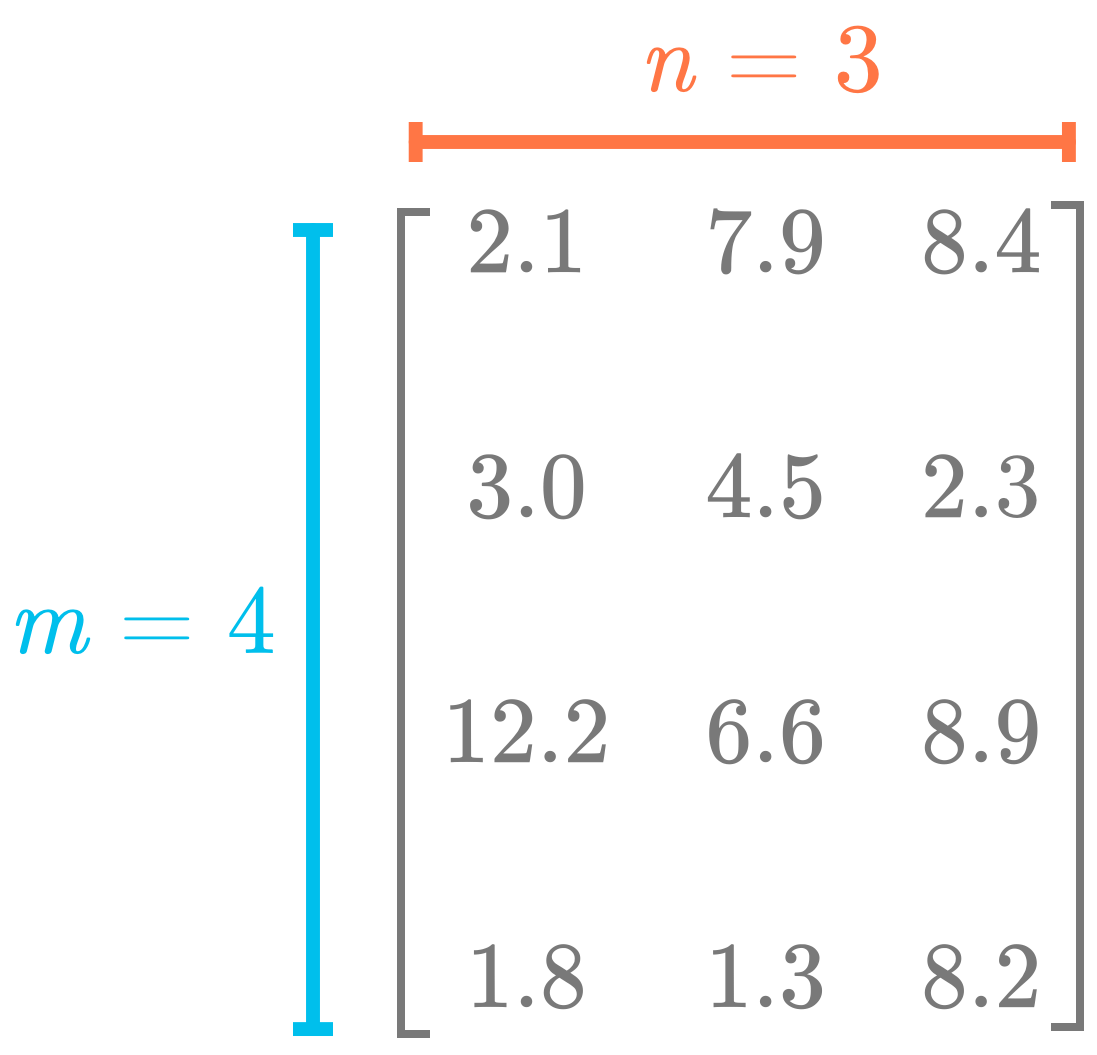<figcaption aria-hidden="true">Figure 93: Matrices are two-dimensional arrays. The number of rows is usually denoted as <span class="math inline"><em>m</em></span> and the number of columns as <span class="math inline"><em>n</em></span>.</figcaption>
</figure>

The *shape* of an array gives you the number of components in each
dimension, as illustrated in Figure [93](#fig:ch07_matrix_dimensions).
Since this matrix is two-dimensional (rows and columns), you need two
values to describe the shape (the number of rows and the number of
columns in this order).

Let’s start by creating a 2D Numpy array with the method `np.array()`:

In [2]:
A = np.array([[2.1, 7.9, 8.4],
              [3.0, 4.5, 2.3],
              [12.2, 6.6, 8.9],
              [1.8, 1., 8.2]])

Note that we use arrays in arrays (`[[]]`) to create the 2D array. This
differs from creating a 1D array by the number of square brackets that
you use.

Like with vectors, it is possible to access the shape property of Numpy
arrays:

In [3]:
A.shape

(4, 3)

You can see that the shape contains two numbers: they correspond to the
number of rows and column respectively.

### 6.1.3 Indexing

To get a matrix entry, you need two indexes: one to refer to the row
index and one to refer to the column index.

Using Numpy, the indexing process is the same to that of vectors. You
just need to specify two indexes. Let’s take again the following matrix
$\mA$:

In [4]:
A = np.array([[2.1, 7.9, 8.4],
              [3.0, 4.5, 2.3],
              [12.2, 6.6, 8.9],
              [1.8, 1.3, 8.2]])

It is possible to get a specific entry with the following syntax:

In [5]:
A[1, 2]

2.3

`A[1, 2]` returns the component with the row index one and the column
index two (with a zero-based indexing).

To get a complete column, it is possible to use a colon:

In [6]:
A[:, 0]

array([ 2.1,  3. , 12.2,  1.8])

This returns the first column (index zero) because the colon says that
we want the components from the first to the last rows. Similarly, to
get a specific row, you can do:

In [7]:
A[1, :]

array([3. , 4.5, 2.3])

Being able to manipulate matrices containing data is an essential skill
for data scientists. Checking the shape of your data is important to be
sure that it is organized the way you want. It is also important to know
the data shape you’ll need to use libraries like Sklearn or Tensorflow.

Note that if you specify a single index from a 2D array, Numpy considers
that it is for the first dimension (the rows) and all the values of the
other dimension (the columns) are used. For instance

In [8]:
A[0]

array([2.1, 7.9, 8.4])

$\\[1\baselineskip]$ which is similar to:

In [9]:
A[0, :]

array([2.1, 7.9, 8.4])

#### Vectors and Matrices

With Numpy, if the array is a vector (1D Numpy array), the shape is a
single number:

In [10]:
v = np.array([1, 2, 3])
v.shape

(3,)

You can see that $\vv$ is a vector. If it is a matrix, the shape has two
numbers (the number of value in the rows and in the columns
respectively). For instance:

In [11]:
A = np.array([[2.1, 7.9, 8.4]])
A.shape

(1, 3)

You can see that the matrix has a single row: the first number of the
shape is 1. Once again, using two square brackets, `[[` and `]]`, allows
you to create a two-dimensional array (a matrix).

### 6.1.4 Main Diagonal

The *main diagonal* of a matrix is the diagonal starting at the index
$(1, 1)$ (the upper left corner).

<figure>
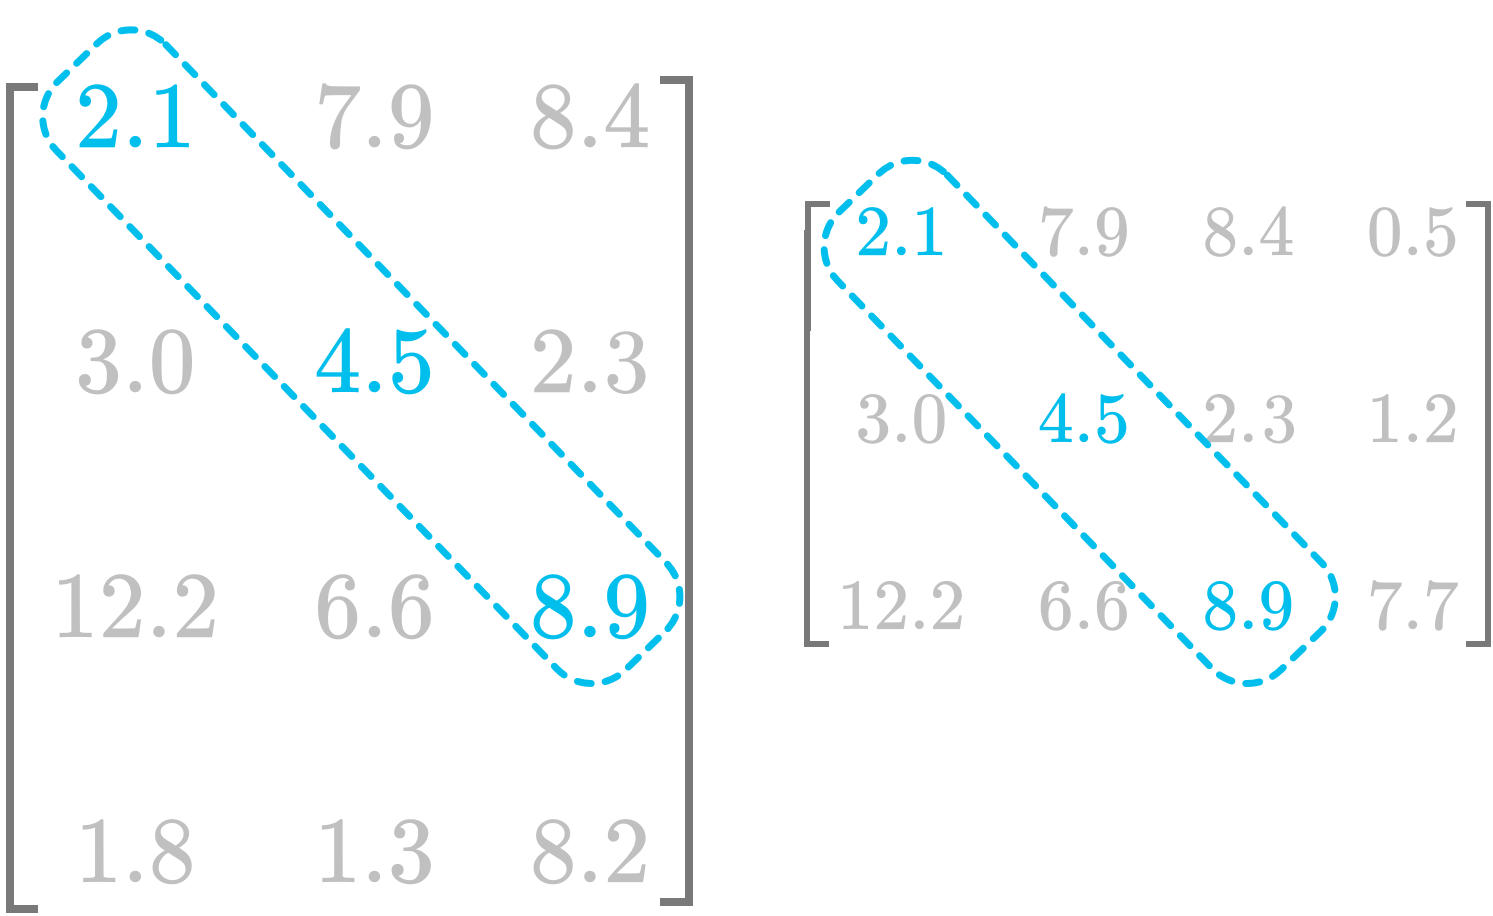<figcaption aria-hidden="true">Figure 94: Main diagonal of rectangle matrices.</figcaption>
</figure>

Figure [94](#fig:ch07_main_diag) illustrates the main diagonal of
rectangular matrices (with more columns than rows or more rows than
columns).

The other diagonal (from the upper right corner to the lower left
corner) is called the *anti-diagonal* or *counter-diagonal*.

### 6.1.5 Tensors

*tensors* are multi-dimensional arrays. This means that scalars, vectors
or matrices are tensors. Arrays with more than two dimensions are also
tensors. The number of indexes needed to get an entry (for instance, two
for a matrix: rows and columns) is called the *rank* of the tensor, not
to be confused with the rank of a matrix that you will learn about in
Section 7.6.1). It is sometimes called *order*
for this reason.

<figure>
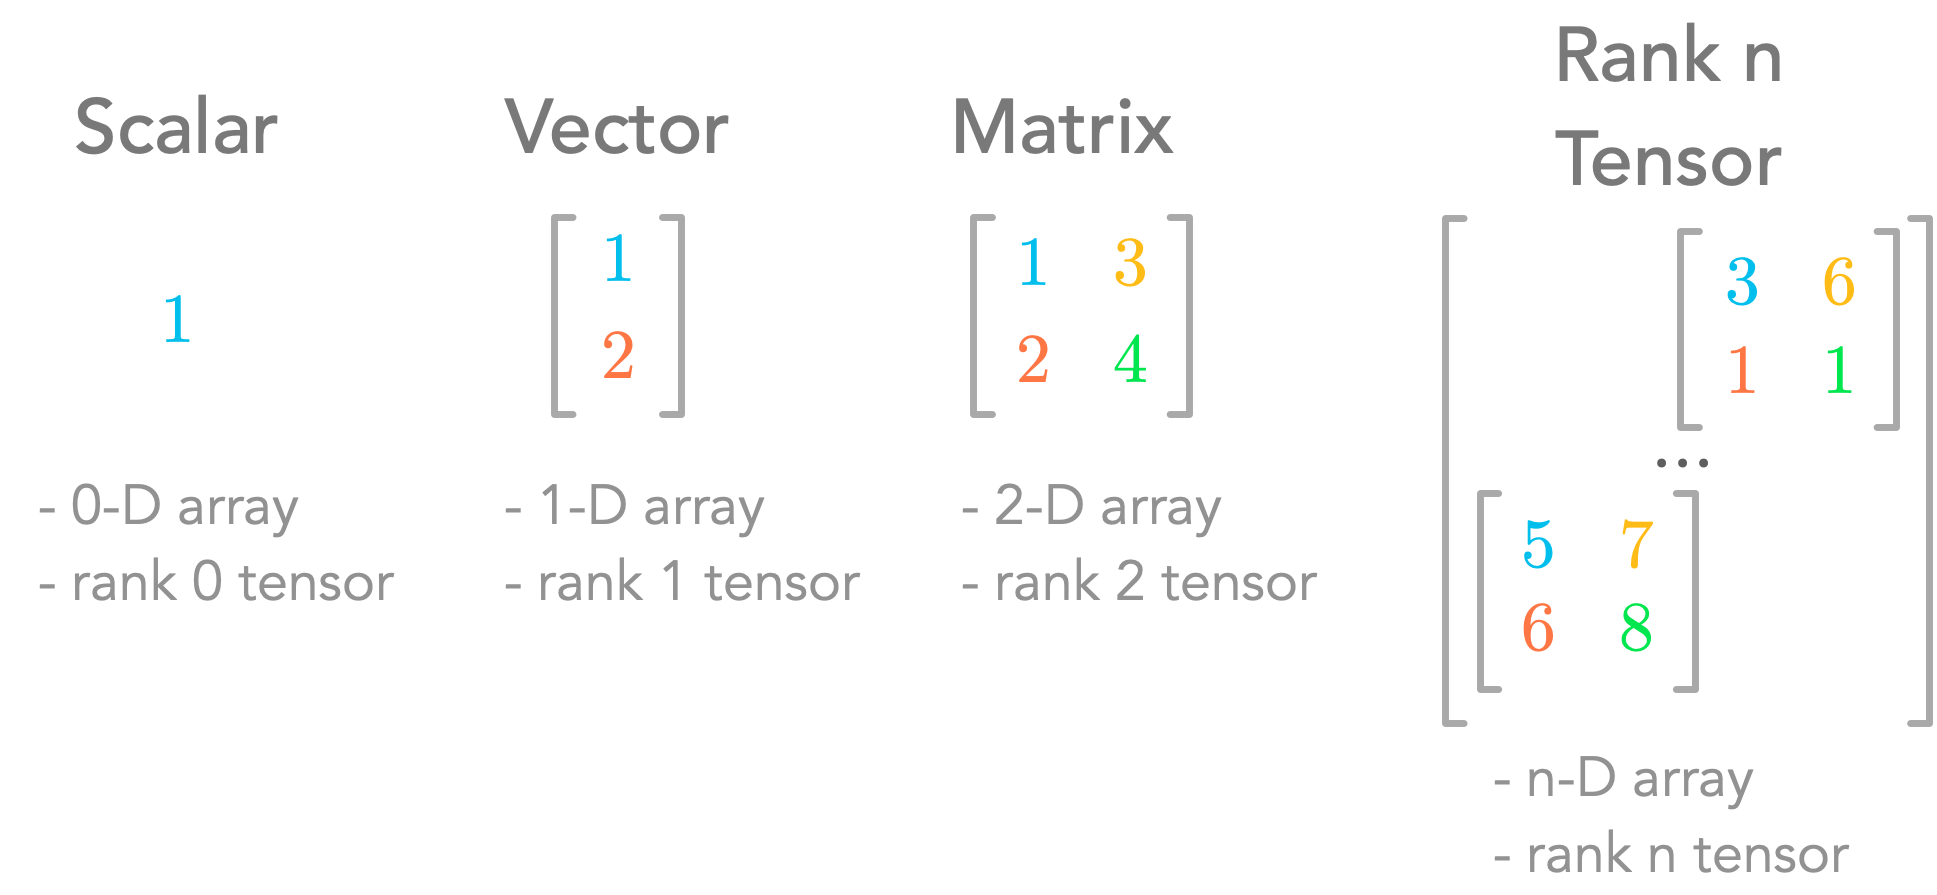<figcaption aria-hidden="true">Figure 95: An example of a scalar, a vector, a matrix and a tensor.</figcaption>
</figure>

The difference between scalars, vectors, matrices and tensors is
summarized in Figure [95](#fig:ch07_scalars_to_tensors). Tensors of rank
0 are scalars, tensors of rank 1 are vectors, tensors of rank 2 are
matrices.

Unlike in pure mathematics or physics, the word *tensor* in machine
learning, deep learning, or data science simply refers to a
multi-dimensional array (you can find nice details about this difference
here:
https://stats.stackexchange.com/questions/198061/why-the-sudden-fascination-with-tensors)
.

For instance, as you’ll see in
Section 6.5,
color images are represented as pixel values. Each pixel is indexed by:

-   Its position on the left/right direction.
-   Its position on the bottom/up direction.
-   Its position in the color list.

For instance, the index \[0, 0, 0\] corresponds to the luminance of the
upper left pixel for the red color (assuming that image is encoded with
the RGB color model).

### 6.1.6 Frobenius Norm

The *Frobenius norm* is a $L^2$ norm (that you have seen in
Section 5.3) applied to a matrix. The matrix
is first flattened (converted to a one-dimensional vector) and the $L^2$
norm is calculated on the resulting vector. The Frobenius norm of the
matrix $\mA$ is denoted as $\left\lVert \mA \right\rVert_{\text{F}}$.
Each component of the matrix is squared and the square root of the sum
is calculated:

$$
\norm{\mA} = \sqrt{\sum_{i,j}A^{2}_{i,j}}
$$

6.2 Operations and Manipulations on Matrices
--------------------------------------------

It is important to know how to manipulate matrices in data science and
machine learning. In this section, you will see how to use addition,
scalar multiplication and transposition with matrices.

### 6.2.1 Addition and Scalar Multiplication

#### Addition

As with vecotrs, you can add matrices by adding each component with the
same index:

<figure>
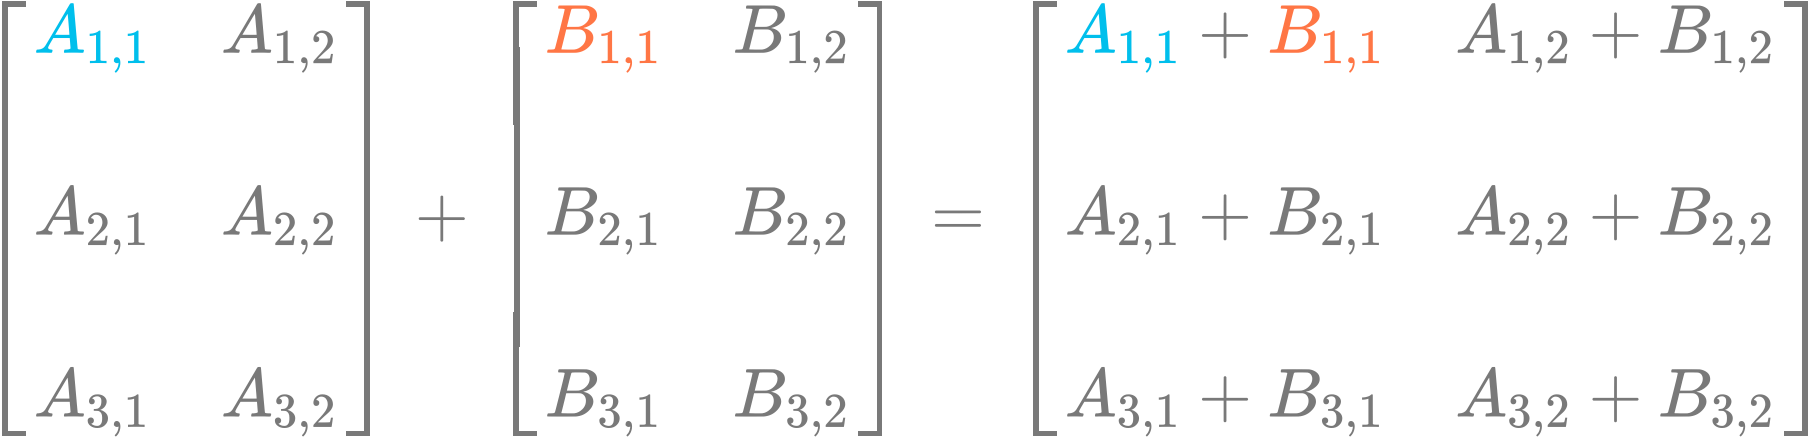<figcaption aria-hidden="true">Figure 96: Addition of two matrices.</figcaption>
</figure>

With Numpy, the addition of matrices is done simply by using the `+`
operator, like with scalars:

In [12]:
A = np.array([[2, 7],
              [3, 4],
              [8, 2]])
B = np.array([[3, 1],
              [4, 5],
              [7, 6]])
A + B

array([[ 5,  8],
       [ 7,  9],
       [15,  8]])

To add matrices, you need to ensure that they have the same shape. The
resulting matrix will also have the same shape:

In [13]:
(A + B).shape

(3, 2)

Systematically check the shape of your data, it is a good way to follow
the processing and be sure that there is no issue.

#### Broadcasting

With Numpy, addition can sometimes work even if matrices have different
shapes. Look at the following example:

In [14]:
A = np.array([[2, 7],
              [3, 4],
              [8, 2]])

In [15]:
B = np.array([[7],
              [1],
              [3]])

The matrix $\mA$ has 3 by 2 entries and the matrix $\mB$ is 3 by 1.
However, you can still perform addition with Numpy:

In [16]:
A + B

array([[ 9, 14],
       [ 4,  5],
       [11,  5]])

Since $\mB$ has only one column, it is added to each column of $\mA$.
This is called *broadcasting*. When possible, the smaller matrix will be
augmented by duplication to match the shape required for the operation.
In our example, the single column vector $\mB$ was duplicated to match
the two columns of $\mA$. The version of $\mB$ would look like:

$$
\begin{bmatrix}
7 & 7 \\\\
1 & 1 \\\\
3 & 3
\end{bmatrix}
$$

Broadcasting is useful, but you should also be cautious since it can
lead to unexpected results if you’re not aware of your data shapes.

#### Scalar Multiplication

Another major operation is *scalar multiplication* and refers to
multiplying a matrix by a scalar. In this case, each entry is multiplied
by this scalar:

$$
c\mA = c
\begin{bmatrix}
\emA_{1,1} & \emA_{1,2} \\\\
\emA_{2,1} & \emA_{2,2} \\\\
\emA_{3,1} & \emA_{3,2}
\end{bmatrix}
= \begin{bmatrix} 
c \cdot \emA_{1,1} & c \cdot \emA_{1,2} \\\\
c \cdot \emA_{2,1} & c \cdot \emA_{2,2} \\\\
c \cdot \emA_{3,1} & c \cdot \emA_{3,2}
\end{bmatrix}
$$

Let’s take the example of the following matrix $\mA$:

In [17]:
A = np.array([[2, 7],
              [3, 4],
              [8, 2]])

Let’s multiply $\mA$ by a scalar (here -2):

In [18]:
-2 * A

array([[ -4, -14],
       [ -6,  -8],
       [-16,  -4]])

As you have seen in Section 5,
scalar multiplication works the same with matrices than with vectors.

### 6.2.2 Transposition

Transposition is a core manipulation in data science and machine
learning. It allows you to exchange the rows and the columns of a
matrix.

For instance, if your dataset is structured with the observations as the
rows but you want to use a machine learning framework where observations
must be the columns, you’ll need to transpose it.

#### From Vector Transposition

Transposing a vector converts a column vector into a row vector or the
opposite. This comes from considering vectors as matrices with only one
row (row vector) or one column (column vector). As you’ll see, the
general rule to transpose matrices is to flip the cells through the main
diagonal.

It is possible to transpose a Numpy vector with the `T` attribute of
arrays only if its number of dimension is larger than one. It is not
possible to exchange rows and columns if there is a single dimension, in
which case the transposition gives the original vector.

#### Matrix Transposition

The transposition of vectors can be extended to matrices if you consider
one column at a time. For each column, the values below the main
diagonal are exchanged with the values on the right of the main
diagonal. In other words, for each component of the main diagonal of the
matrix, the corresponding row becomes the corresponding column.

<figure>
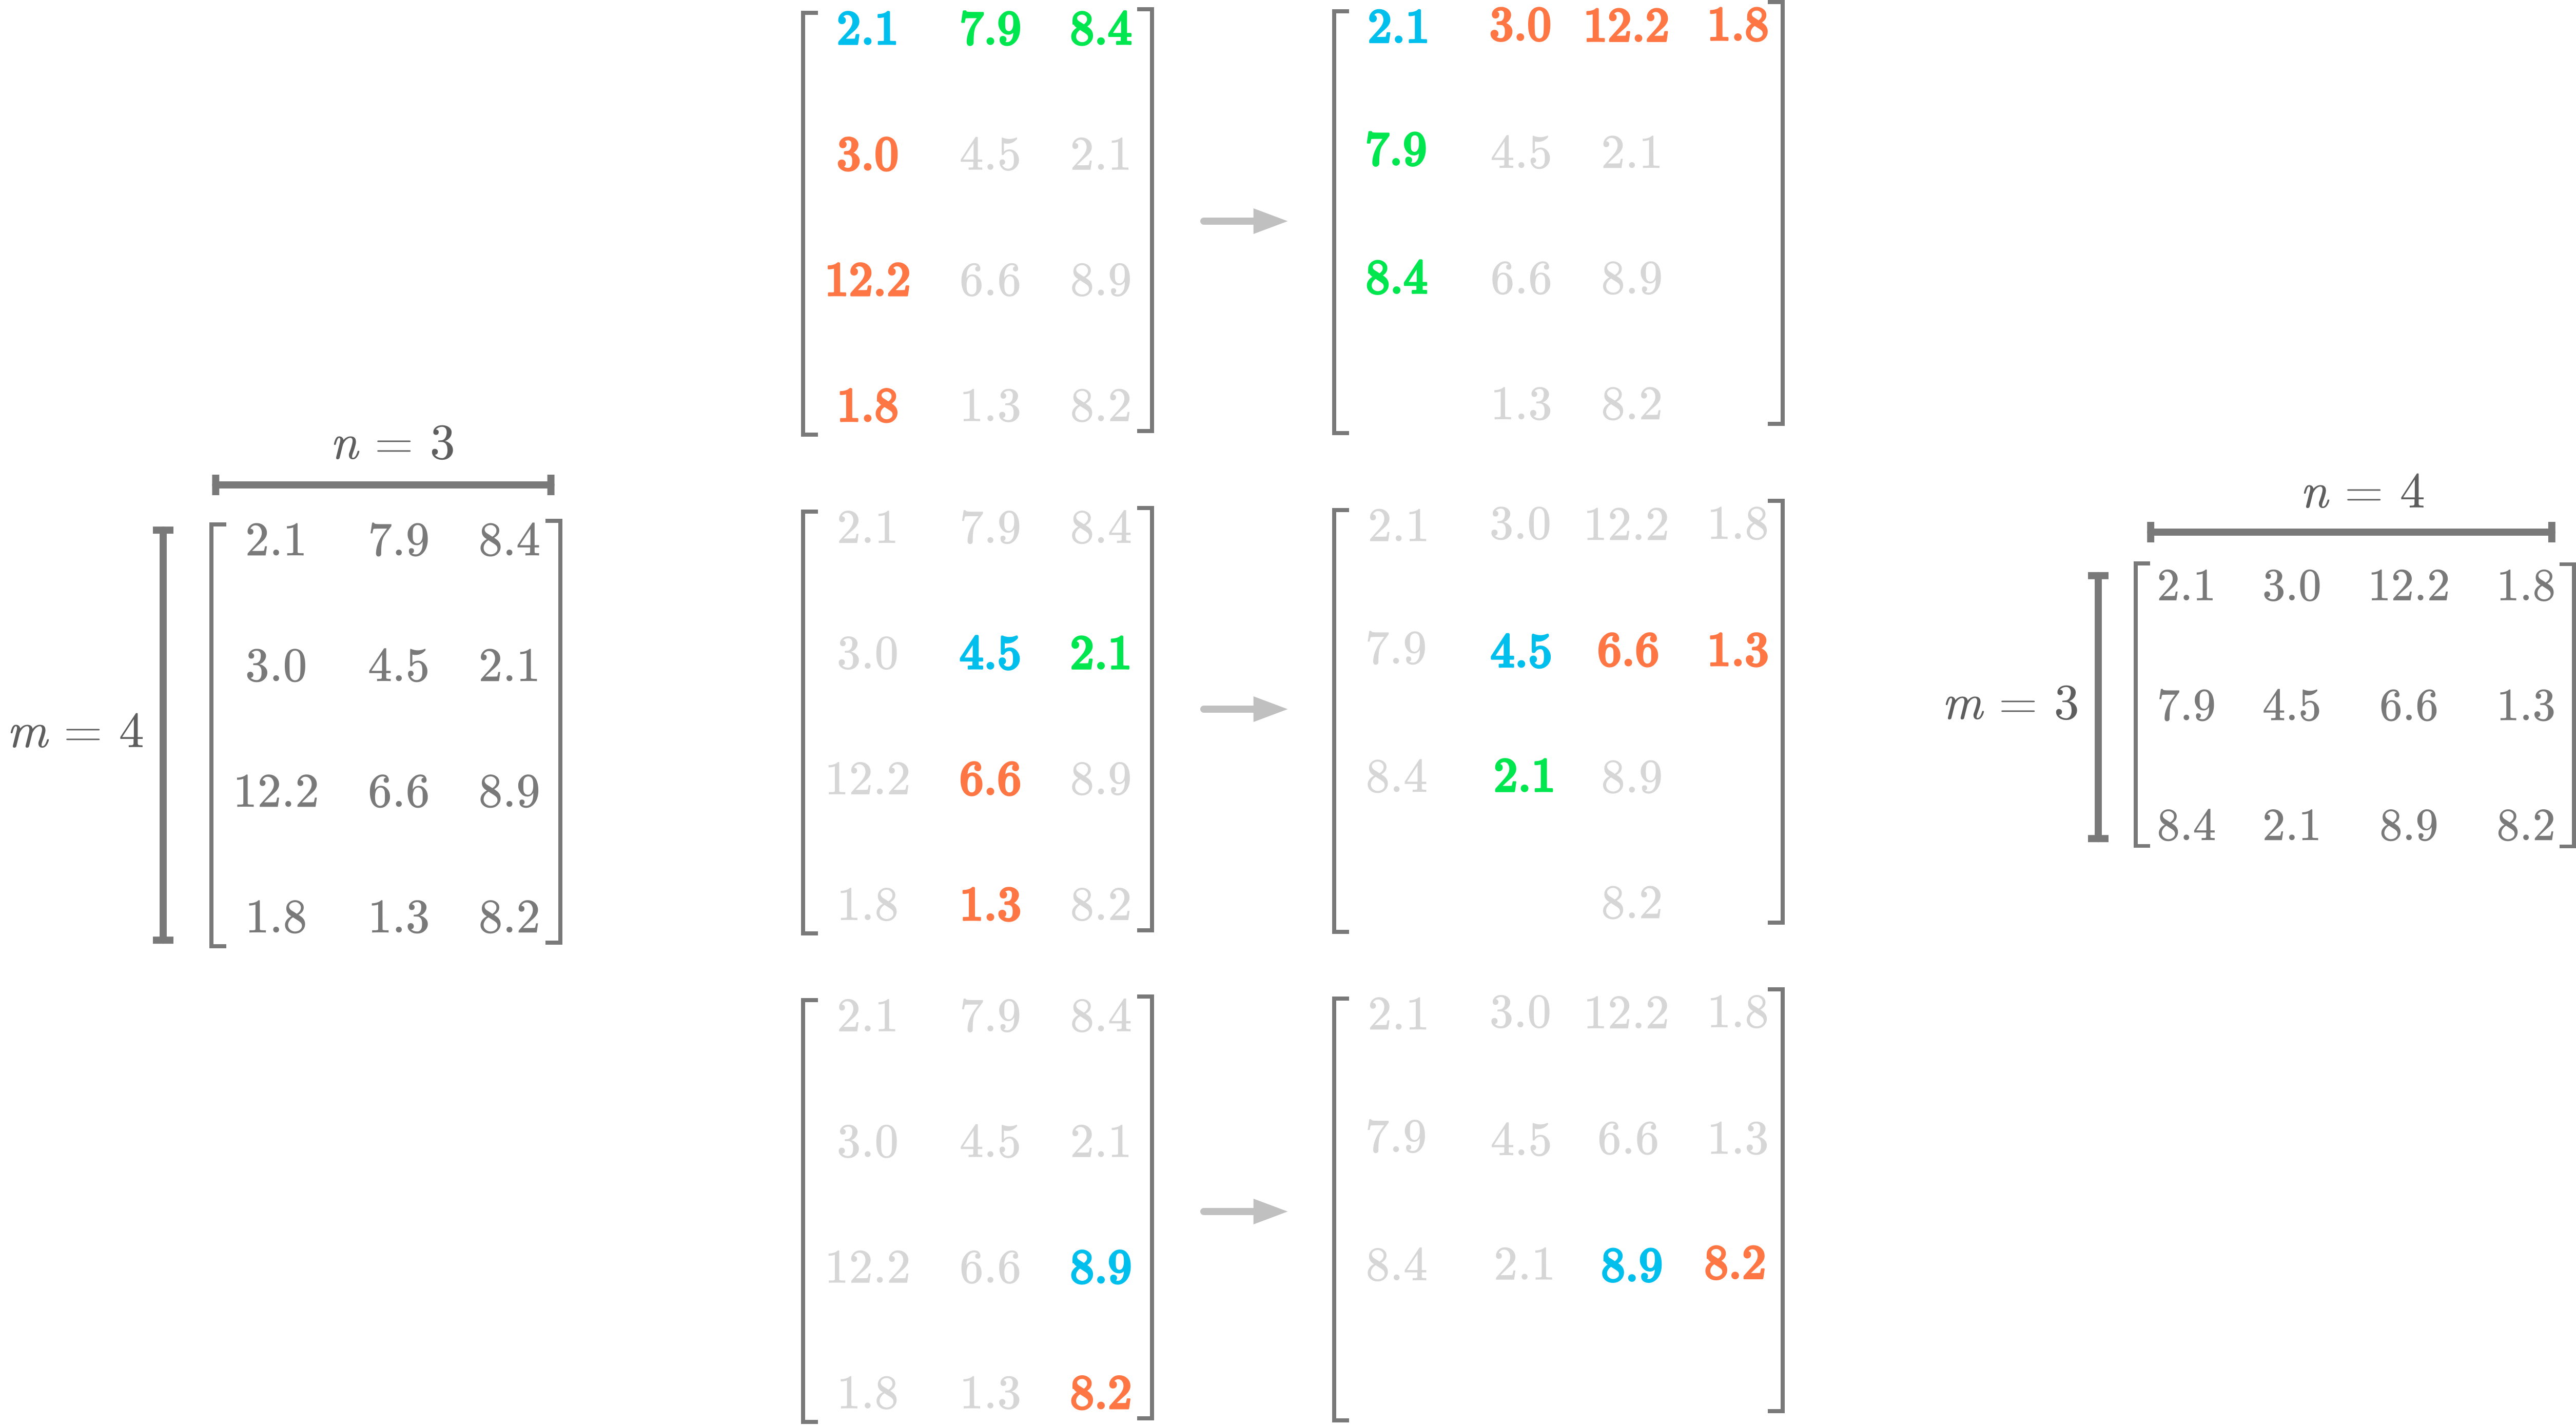<figcaption aria-hidden="true">Figure 97: Steps of matrix transposition.</figcaption>
</figure>

Figure [97](#fig:ch07_matrix_transposition) illustrates these steps. You
can see that a 4 by 3 matrix becomes a 3 by 4 matrix because rows and
columns are exchanged. More generally, a $m$ by $n$ matrix becomes a $n$
by $m$ matrix. In the middle panel, you can see the steps corresponding
to each of the three diagonal values, where each row and column are
exchanged.

Let’s do this transposition with Numpy:

In [19]:
A = np.array([[2.1, 7.9, 8.4],
              [3.0, 4.5, 2.1],
              [12.2, 6.6, 8.9],
              [1.8, 1.3, 8.2]])
A.T

array([[ 2.1,  3. , 12.2,  1.8],
       [ 7.9,  4.5,  6.6,  1.3],
       [ 8.4,  2.1,  8.9,  8.2]])

#### Properties of Transposition

Finally, let’s see some properties of the matrix transposition.

The transpose of $\mA + \mB$ is:

$$
(\mA + \mB)^{\text{T}} = \mA^{\text{T}} + \mB^{\text{T}}
$$

The transpose of a scalar multiplication corresponds to the scalar
multiplication of the transpose of the matrix:

$$
(c \mA)^\text{T} = c \mA^\text{T}
$$

However, you’ll see the transpose of a matrix product in
Section 6.3.3.

6.3 Matrix Product
------------------

You learn about the dot product in
Section 5.4. The equivalent
operation for matrices is called the *matrix product*, or *matrix
multiplication*. It takes two matrices and returns another matrix. This
is a core operation in linear algebra.

### 6.3.1 Matrices with Vectors

The simpler case of matrix product is between a matrix and a vector
(that you can consider as a matrix product with one of them having a
single column).

<figure>
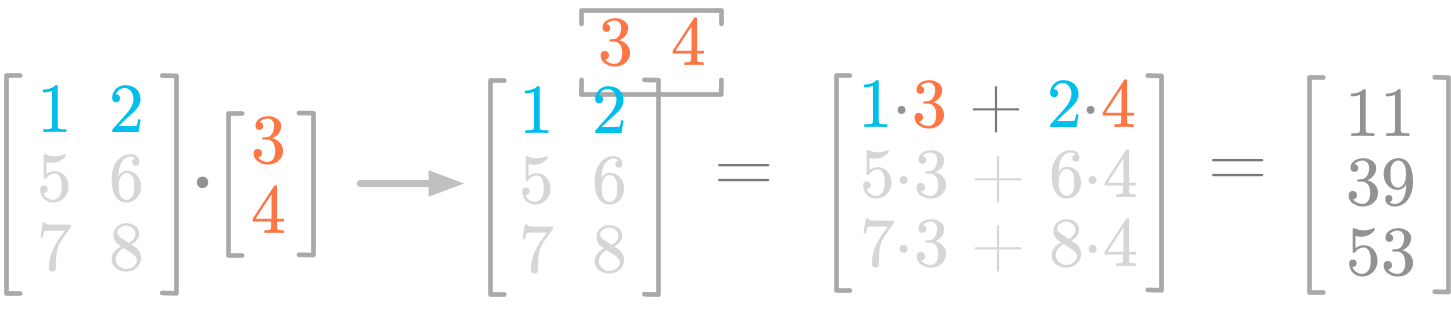<figcaption aria-hidden="true">Figure 98: Steps of the product between a matrix and a vector.</figcaption>
</figure>

Figure [98](#fig:ch07_matrix_vector_dot_product) illustrates the steps
of the product between a matrix and a vector. Let’s consider the first
row of the matrix. You do the dot product between the vector (the values
3 and 4 in red) and the row you’re considering (the values 1 and 2 in
blue). You multiply the values by pairs: the first value in the row with
the first in the column vector ($1 \cdot 3$), and the second in the row
with the second in the vector ($2 \cdot 4$). It gives you the first
component of the resulting matrix ($1 \cdot 3 + 2 \cdot 4 = 11$).

You can see that the matrix-vector product relates to the dot product.
It is like splitting the matrix $\mA$ in three rows and applying the dot
product (as in Section 5.4).

Let’s see how it works with Numpy.

In [20]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8]
])
v = np.array([3, 4]).reshape(-1, 1)
A @ v

array([[11],
       [39],
       [53]])

Note that we used the `reshape()` function to reshape the vector into a
2 by 1 matrix (the `-1` tells Numpy to guess the remaining number).
Without it, you would end with a one-dimensional array instead of a
two-dimensional array here (a matrix with a single column).

#### Weighting of the Matrix’s Columns

There is another way to think about the matrix product. You can consider
that the vector contains values that weight each column of the matrix.
(as explained by Gilbert Strang in his introduction to linear algebra
that I recommend: Strang, G. “Introduction to linear algebra, 5th edn.
Wellesley.”, 2016.) It clearly shows that the length of the vector needs
to be equal to the number of columns of the matrix on which the vector
is applied.

<figure>
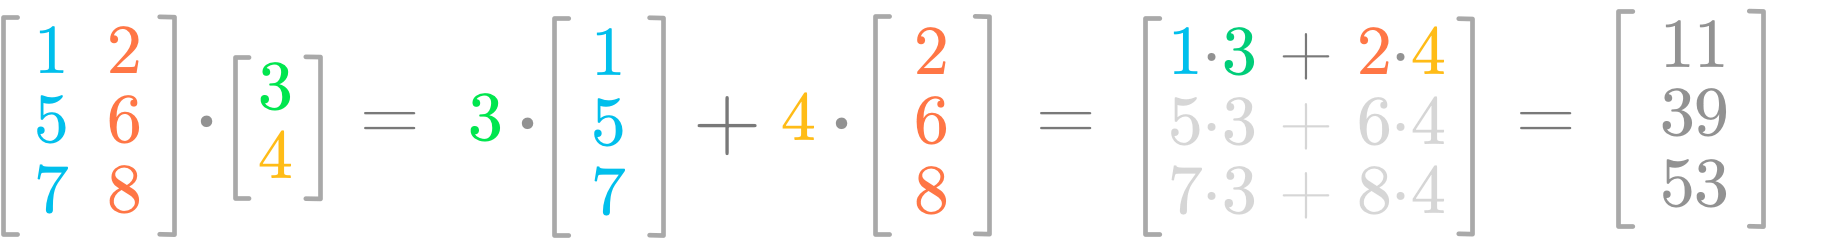<figcaption aria-hidden="true">Figure 99: The vectors values are weighting the columns of the matrix.</figcaption>
</figure>

Figure [99](#fig:ch07_matrix_vector_dot_product_weights) might help to
visualize this concept. You can consider the vector values (3 and 4) as
weights applied to the columns of the matrix. The rules about scalar
multiplication that you saw earlier lead to the same results as before.

Using the last example, you can write the dot product between $\mA$ and
$\vv$ as follows:

$$
\begin{aligned}
\mA \vv &=
\begin{bmatrix}
    1 & 2 \\\\
    5 & 6 \\\\
    7 & 8
\end{bmatrix}
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix} \\\\
&= 3 \begin{bmatrix}
    1 \\\\
    5 \\\\
    7
\end{bmatrix} + 4 \begin{bmatrix}
    2 \\\\
    6 \\\\
    8
\end{bmatrix}
\end{aligned}
$$

This is important because, as you’ll see in more details in
Section 7.2, it shows that
$\mA \vv$ is a linear combination of the columns of $\mA$ with the
coefficients being the values from $\vv$.

#### Shapes

In addition, you can see that the shapes of the matrix and the vector
must match for the dot product to be possible.

<figure>
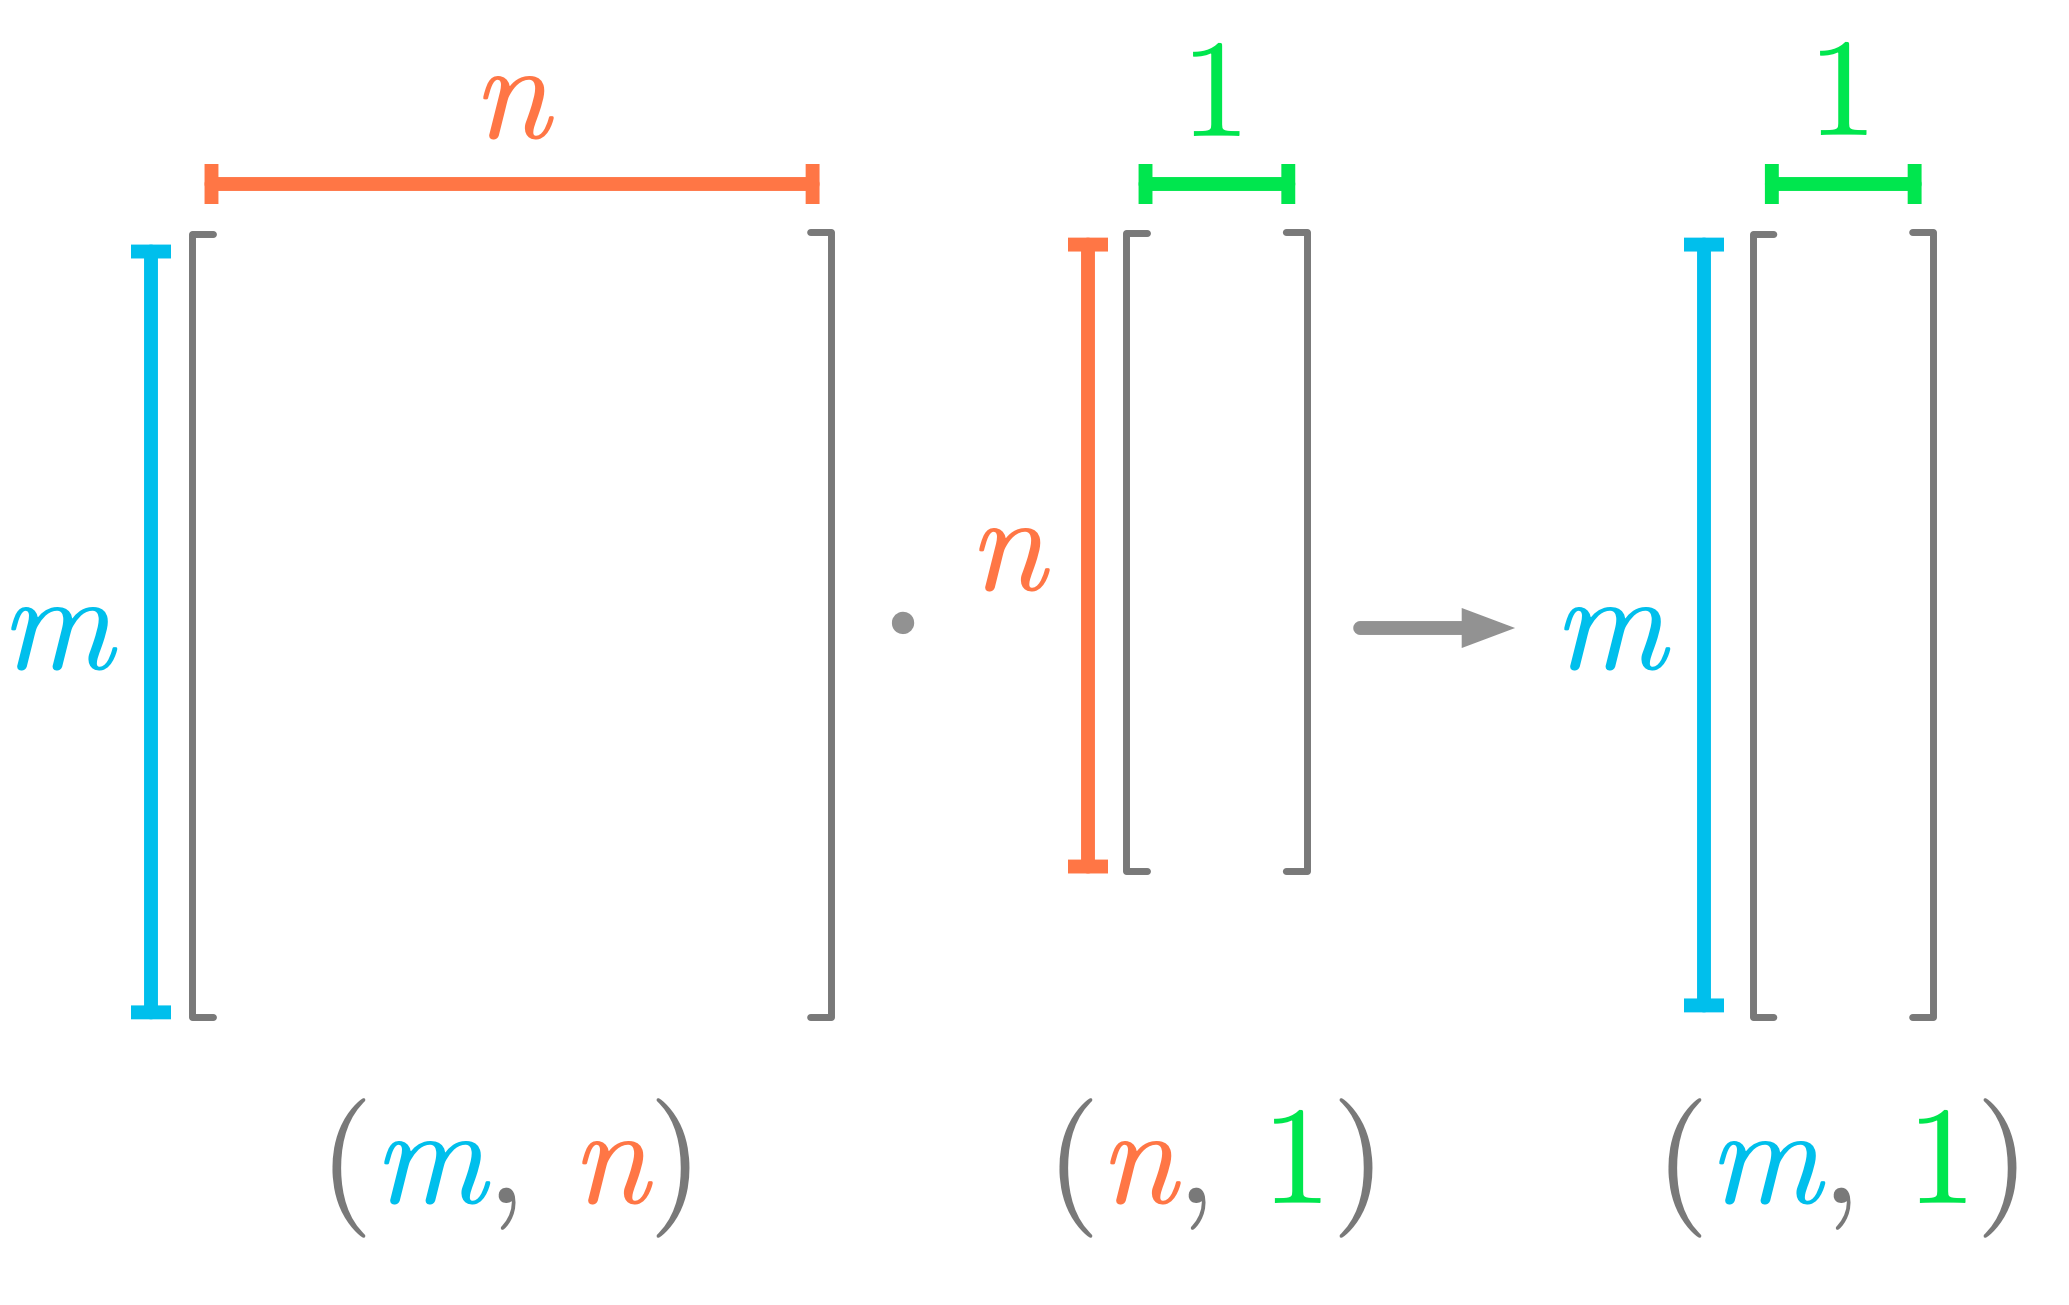<figcaption aria-hidden="true">Figure 100: Shapes needed for the dot product between a matrix and a vector.</figcaption>
</figure>

Figure [100](#fig:ch07_matrix_vector_dot_product_shapes) summarizes the
shapes involved in the matrix-vector product and shows that the number
of columns of the matrix must be equal to the number of rows of the
vector.

### 6.3.2 Matrices Product

The *matrix product* is the equivalent of the dot product operation for
two matrices. As you’ll see, it is similar to the matrix-vector product,
but applied to each column of the second matrix.

<figure>
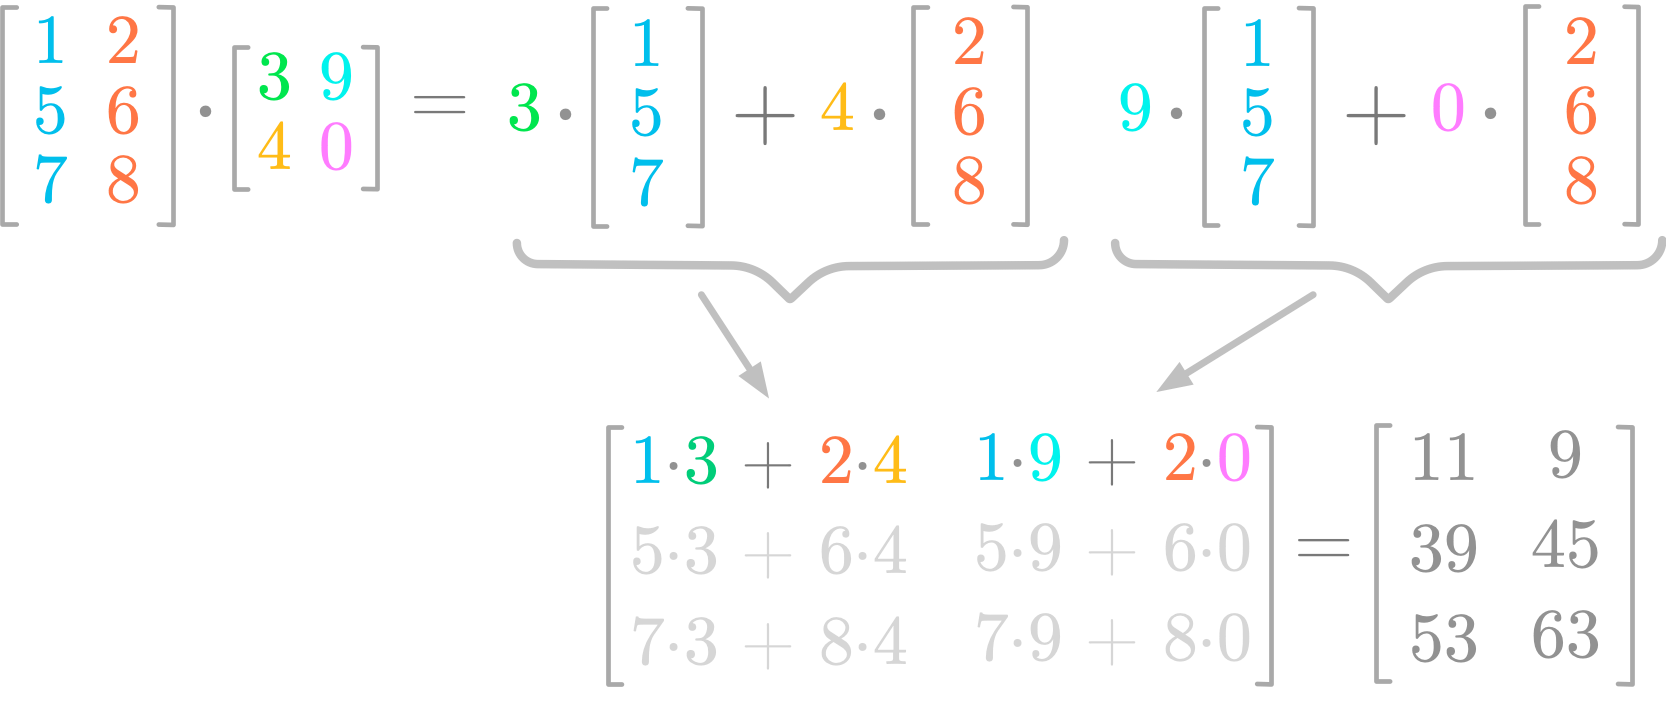<figcaption aria-hidden="true">Figure 101: Matrix product.</figcaption>
</figure>

Figure [101](#fig:ch07_matrix_matrix_dot_product) shows you an example
of matrix product. You can see that the resulting matrix has two
columns, as the second matrix. The values of first column of the second
matrix (3 and 4) weight the two columns and the result fills the first
column of the resulting matrix. Similarly, the values of the second
column of the second matrix (9 and 0) weight the two columns and the
result fills the second column of the resulting matrix.

With Numpy, you can calculate the matrix product exactly as the dot
product:

In [21]:
A = np.array([
    [1, 2],
    [5, 6],
    [7, 8],
])
B = np.array([
    [3, 9],
    [4, 0]
])

A @ B

array([[11,  9],
       [39, 45],
       [53, 63]])

#### Shapes

Like with the matrix-vector product and as illustrated in Figure
[102](#fig:ch07_matrix_matrix_dot_product_shapes), the number of columns
of the first matrix must match the number of rows of the second matrix.

<figure>
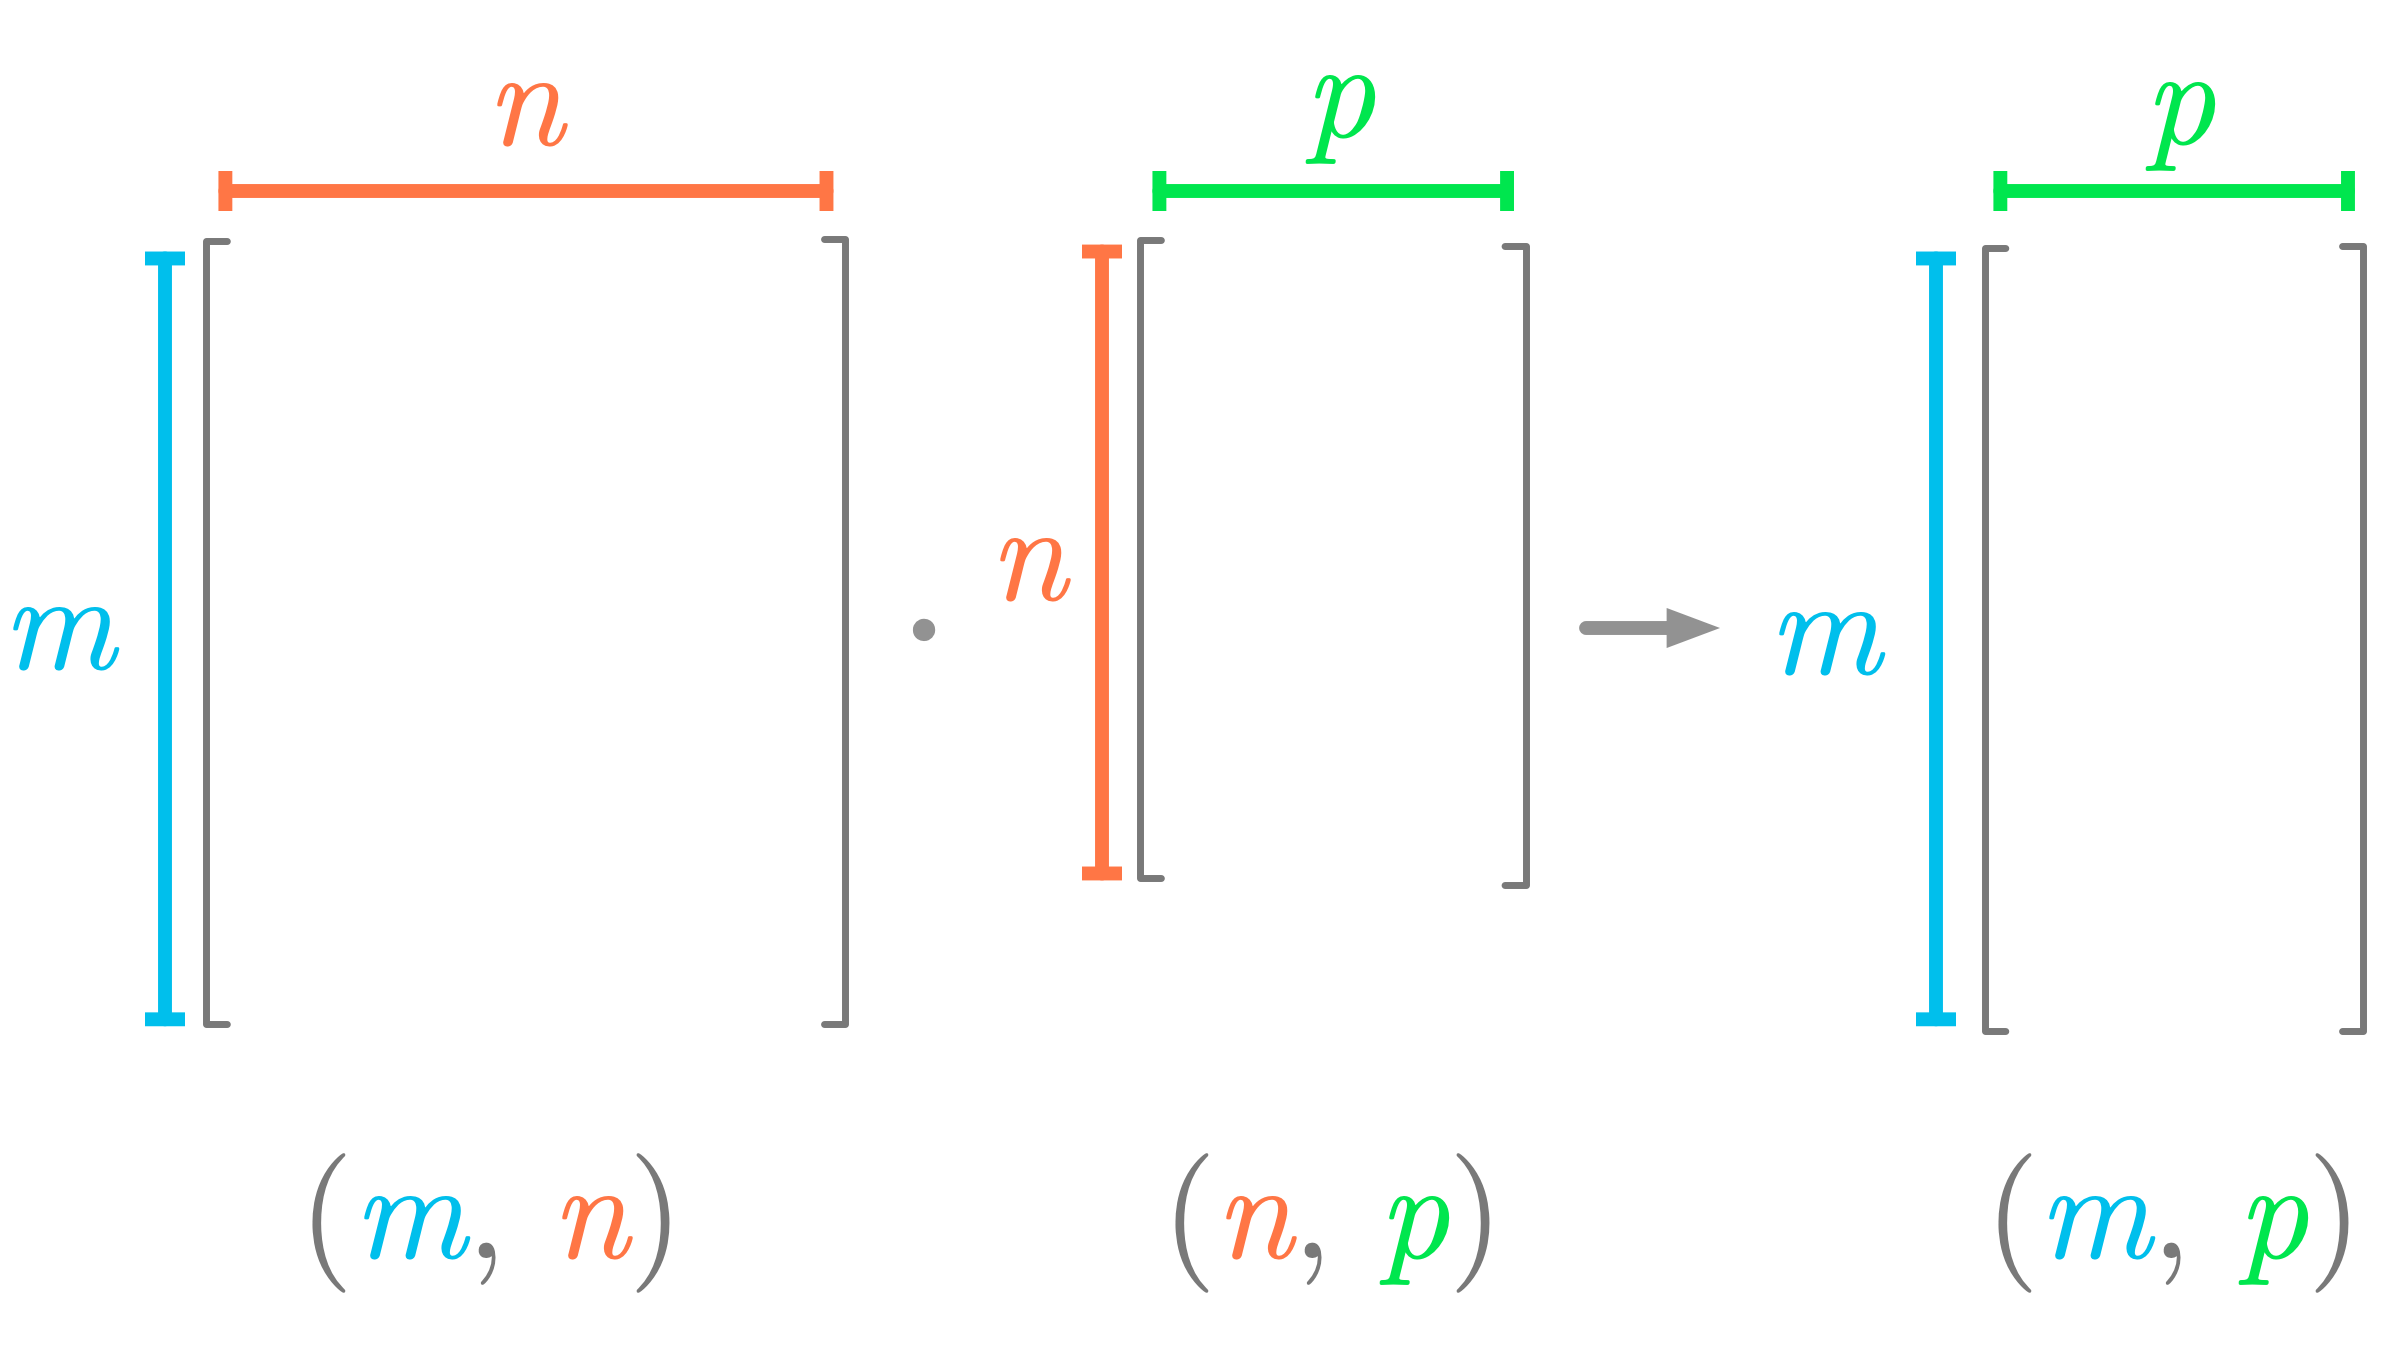<figcaption aria-hidden="true">Figure 102: Shapes must match for the dot product between two matrices.</figcaption>
</figure>

The resulting matrix has as many rows as the first matrix and as many
columns as the second matrix.

Let’s try it.

In [22]:
A = np.array([
    [1, 4],
    [2, 5],
    [3, 6],
])

In [23]:
B = np.array([
    [1, 4, 7],
    [2, 5, 2],
])

The matrices $\mA$ and $\mB$ have different shapes. Let’s calculate
their dot product:

In [24]:
A @ B

array([[ 9, 24, 15],
       [12, 33, 24],
       [15, 42, 33]])

You can see the result of $\mA \cdot \mB$ is a 3 by 3 matrix. This shape
comes from the number of rows of $\mA$ (3) and the number of columns of
$\mB$ (3).

#### Matrix Product to Calculate the Covariance Matrix

You can calculate the covariance matrix (more details about the
covariance matrix in
Section 2.1.3) of a dataset with
the product between the matrix containing the variables and its
transpose. Then, you divide by the number of observations (or this
number minus one for the Bessel correction). You need to be sure that
the variables are centered around zero beforehand (this can be done by
subtracting the mean).

Let’s simulate the following variables $x$, $y$ and $z$:

In [25]:
x = np.random.normal(10, 2, 100)
y = x * 1.5 + np.random.normal(25, 5, 100)
z = x * 2 + np.random.normal(0, 1, 100)


Using Numpy, the covariance matrix is:

In [26]:
np.cov([x, y, z])

array([[ 4.34760654,  6.12314509,  8.40718422],
       [ 6.12314509, 27.16680947, 11.66323088],
       [ 8.40718422, 11.66323088, 17.44534938]])

Now, using the matrix product, you first need to stack the variables as
columns of a matrix:

In [27]:
X = np.vstack([x, y, z]).T
X.shape

(100, 3)

You can see that the variable `X` is a 100 by 3 matrix: the 100 rows
correspond to the observations and the 3 columns to the features. Then,
you center this matrix around zero:

In [28]:
X = X - X.mean(axis=0)

Finally, you calculate the covariance matrix:

In [29]:
(X.T @ X) / (X.shape[0] - 1)

array([[ 4.34760654,  6.12314509,  8.40718422],
       [ 6.12314509, 27.16680947, 11.66323088],
       [ 8.40718422, 11.66323088, 17.44534938]])

You get a covariance matrix similar to the one from the function
`np.cov()`. This is important to keep in mind that the dot product of a
matrix with its transpose corresponds to the covariance matrix.

### 6.3.3 Transpose of a Matrix Product

The transpose of the dot product between two matrices is defined as
following:

$$
(\mA \mB)^{\text{T}} = \mB^{\text{T}} \mA^{\text{T}}
$$

For instance, take the following matrices $\mA$ and $\mB$:

In [30]:
A = np.array([
    [1, 4],
    [2, 5],
    [3, 6],
])
B = np.array([
    [1, 4, 7],
    [2, 5, 2],
])

You can check the result of $(\mA \mB)^{\text{T}}$ and
$\mB^{\text{T}} \mA^{\text{T}}$:

In [31]:
(A @ B).T

array([[ 9, 12, 15],
       [24, 33, 42],
       [15, 24, 33]])

In [32]:
B.T @ A.T

array([[ 9, 12, 15],
       [24, 33, 42],
       [15, 24, 33]])

This can be surprising at first that the order of the two vectors or
matrices in the parentheses must change for the equivalence to be
satisfy. Let’s look at the details of the operation.

<figure>
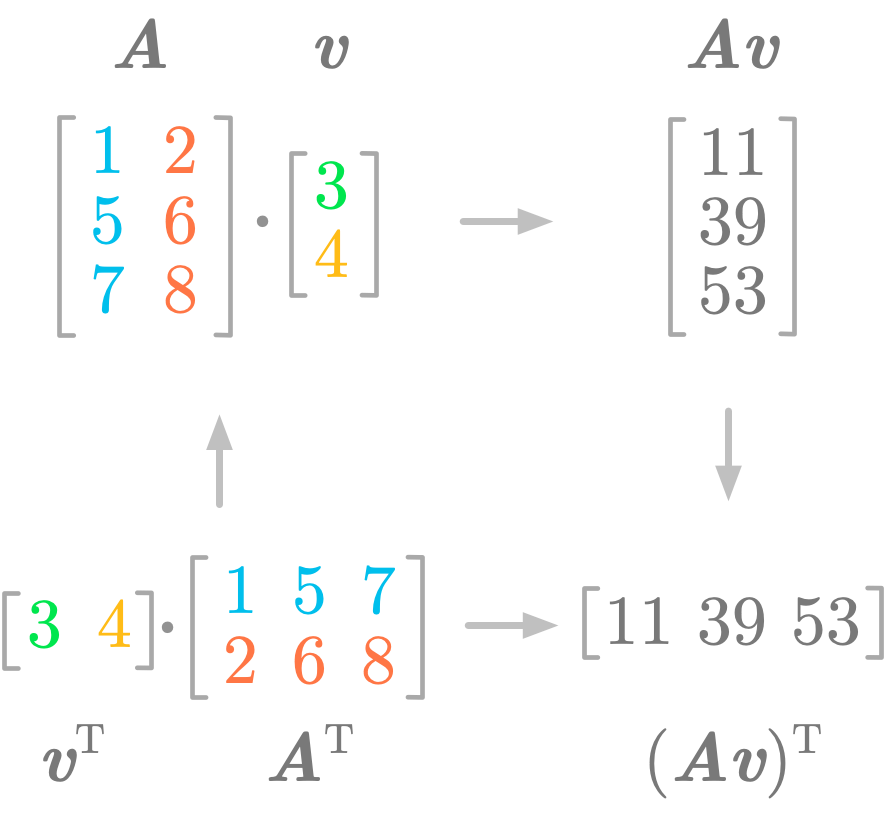<figcaption aria-hidden="true">Figure 103: You must change the order of the vector and the matrix to obtain the transpose of the matrix product.</figcaption>
</figure>

Figure [103](#fig:ch07_reverse_rule_transpose) shows that the transpose
of a matrix product is equal to the product of the transpose if you
change the order of the vector and matrix.

#### More than two Matrices or Vectors

You can apply this property to more than two matrices or vectors. For
instance,

$$
(\mA \mB \mC)^{\text{T}} = \mC^{\text{T}} \mB^{\text{T}} \mA^{\text{T}}
$$

Keep this property in a corner of your mind. It explains many “cosmetic
rearrangements” that you can encounter when matrices and vectors are
manipulated. Trying these manipulations with code is a great way to
learn.

To conclude, the matrix product is a key concept of linear algebra, and
you will see in Section 7.4 how
it relates to space transformation.

6.4 Special Matrices
--------------------

There are few special matrices that are useful to know because they are
required to understand more advanced linear algebra concepts.

### 6.4.1 Square Matrices

A *square matrix* has the same number of rows as columns ($m=n$)
resulting in a matrix with a square shape. For instance, let’s consider
the following square matrix:

$$
\mA=
\begin{bmatrix}
    1 & 7 & 4 \\\\
    2 & 1 & 2 \\\\
    6 & 9 & 12
\end{bmatrix}
$$

The matrix $\mA$ is a square $3 \times 3$ matrix. It has 3 rows and 3
columns.

### 6.4.2 Diagonal Matrices

A *diagonal matrix* is a matrix with zeros everywhere except in the main
diagonal.

<figure>
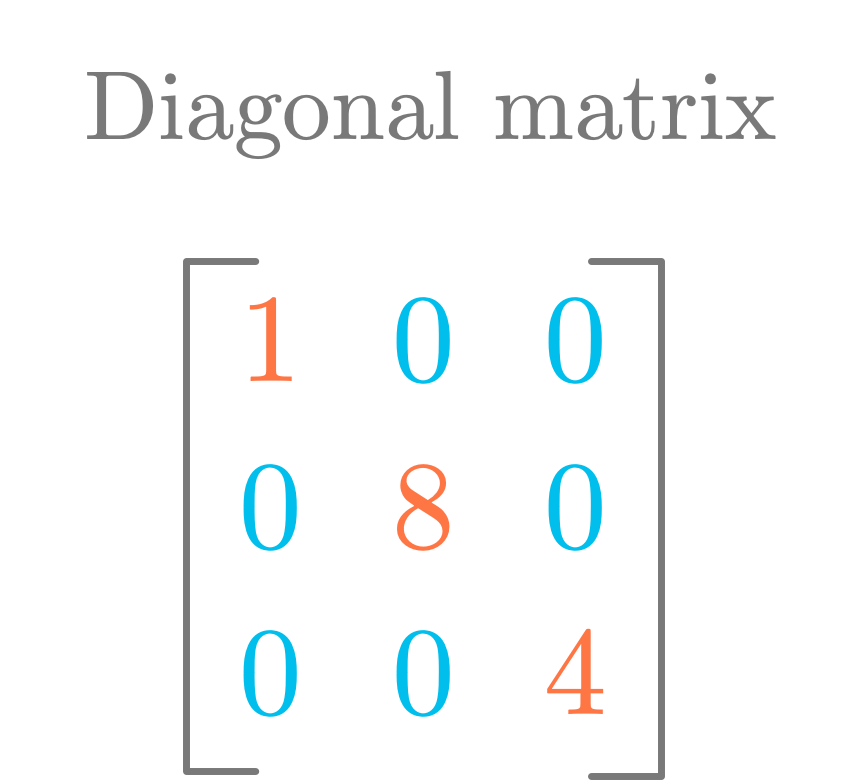<figcaption aria-hidden="true">Figure 104: Example of a diagonal matrix.</figcaption>
</figure>

Figure [104](#fig:ch07_diagonal_matrix) shows an example of a 3 by 3
diagonal matrix.

Diagonal matrices can also be non square. For instance:

$$
\mD=
\begin{bmatrix}
    0.3 & 0 & 0 \\\\
    0 & 4.9 & 0 \\\\
    0 & 0 & 2.0 \\\\
    0 & 0 & 0
\end{bmatrix}
$$

or

$$
\mD=
\begin{bmatrix}
    0.3 & 0 & 0 & 0 \\\\
    0 & 4.9 & 0 & 0 \\\\
    0 & 0 & 2.0 & 0
\end{bmatrix}
$$

You’ll often encounter diagonal matrices, for instance in the context of
Singular Value Decomposition (or SVD), as you’ll learn in
Section 10.

### 6.4.3 Identity Matrices

An *identity matrix* is a square matrix filled with ones in the main
diagonal and zeros elsewhere.

<figure>
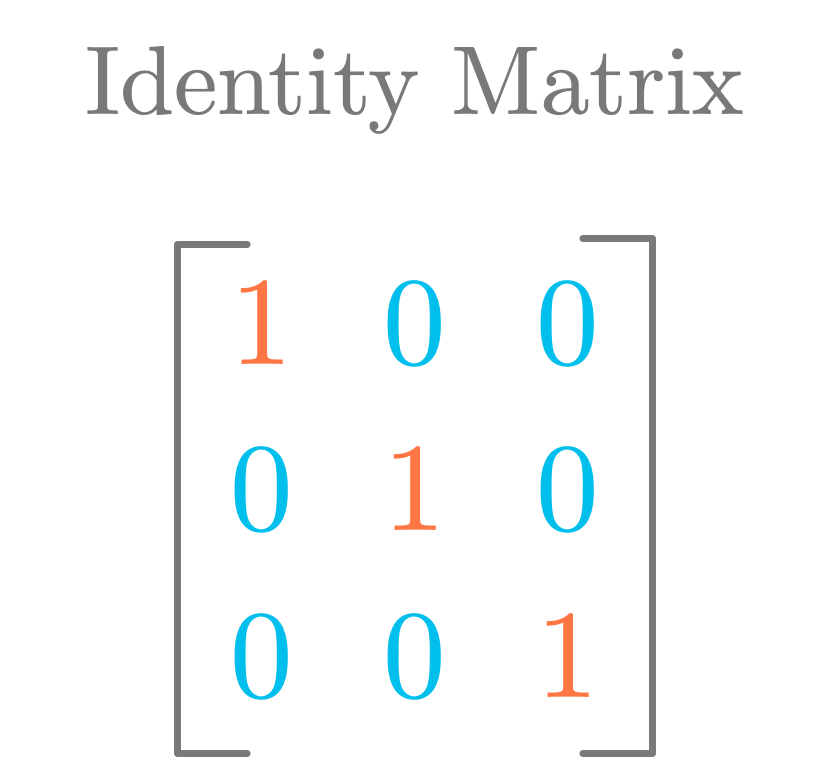<figcaption aria-hidden="true">Figure 105: Example of a 3 by 3 identity matrix.</figcaption>
</figure>

Figure [105](#fig:ch07_identity_matrix) shows an example of a 3 by 3
identity matrix. You can denote the $n \times n$ identity matrix as
$\mI_n$. For instance:

$$
\mI_4=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\\\
    0 & 1 & 0 & 0 \\\\
    0 & 0 & 1 & 0 \\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

One important property of identity matrices is that when they are
multiplied to another matrix, the result is this other matrix unchanged.
It is the equivalent to the multiplication by one with scalars.
Mathematically, you can write:

$$
\mA \mI = \mA
$$

The other way is also true with an identity matrix of the right shape.
You would have:

$$
\mI \mA = \mA
$$

Let’s see how this is the case.

<figure>
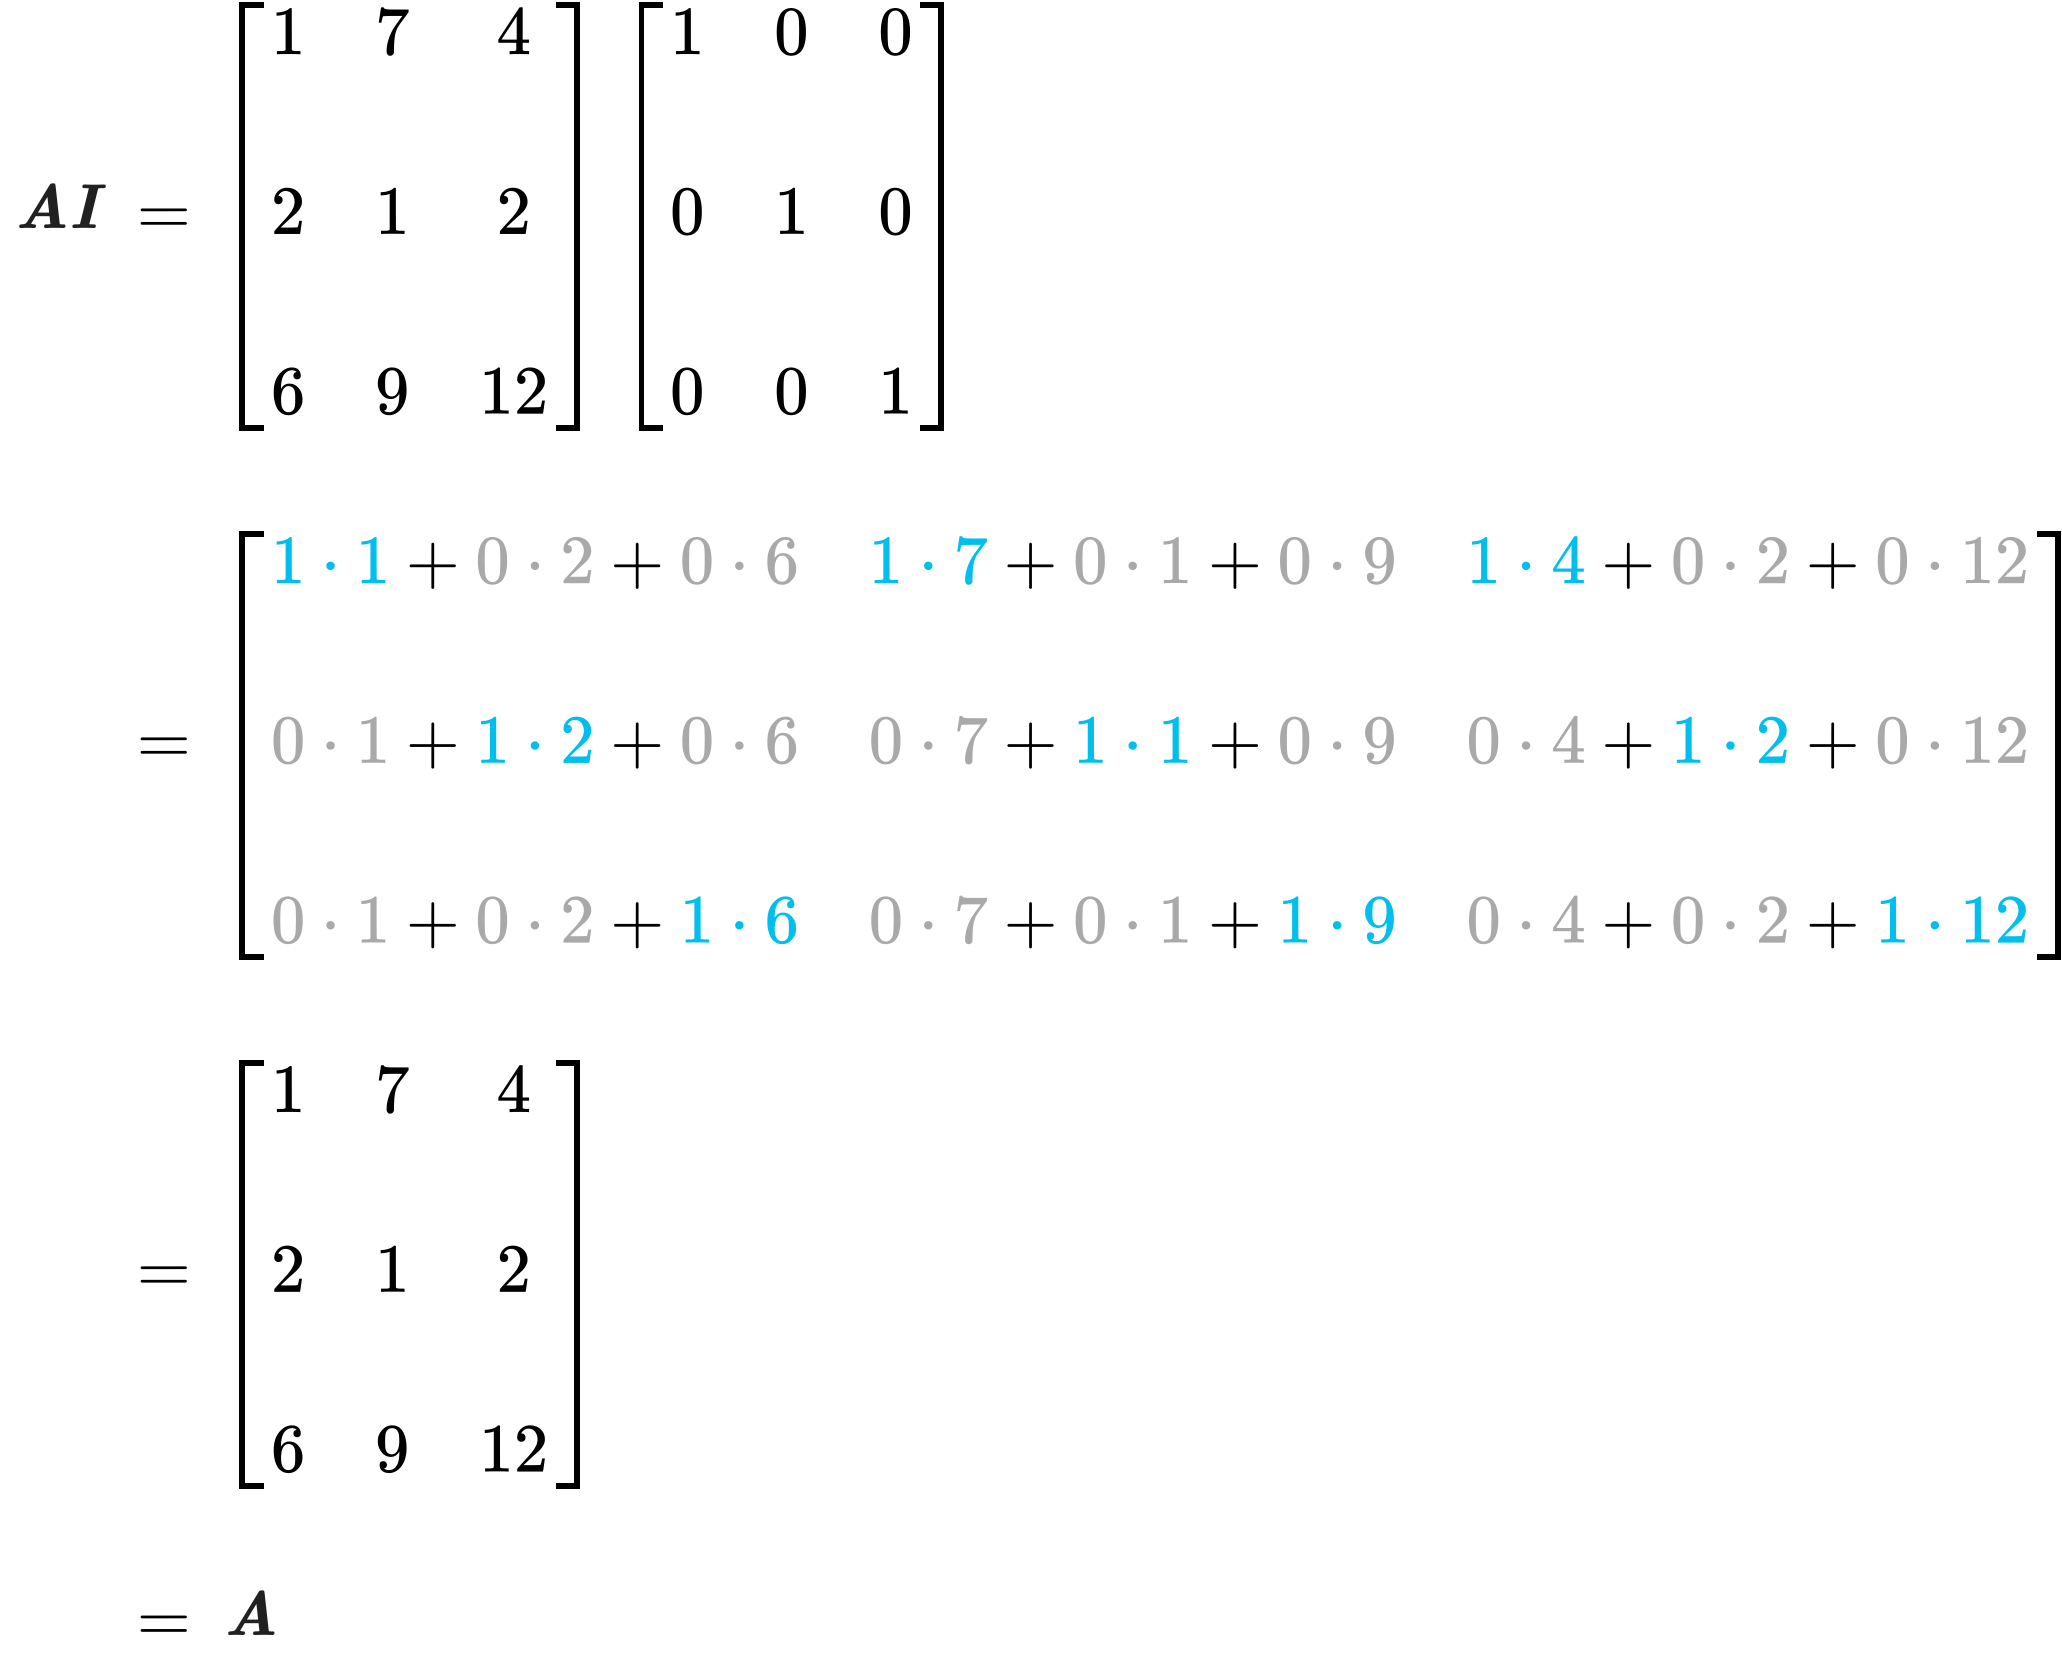<figcaption aria-hidden="true">Figure 106: The identity matrix product.</figcaption>
</figure>

Take the example illustrated in Figure
[106](#fig:ch07_identity_matrix_product). It shows that you multiply
each entry of the matrix by 1 and add the other entries multiplied by 0,
resulting in the same matrix.

It is possible to create identity matrices with the function `np.eye()`
from Numpy. It takes the number of rows and columns as a parameter. For
instance, let’s create a three by three identity matrix:

In [33]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 6.4.4 Inverse Matrices

A matrix $\mA$ is *invertible* if a matrix $\mB$ exists that gives the
identity matrix when it is multiplied by $\mA$. In this case, $\mB$ is
said to be the *inverse* of $\mA$. The relationship between $\mA$ and
$\mB$ is as following:

$$
\mA \mB = \mB \mA = \mI
$$

The inverse of a matrix $\mA$ is denoted $\mA^{-1}$ (pronounced “A
inverse”). So you can write:

$$
\mA \mA^{-1} = \mA^{-1}\mA = \mI
$$

Only square matrices have an inverse. In addition, square matrices that
are not invertible are called *singular matrices*.

Here is an example of a singular matrix:

In [34]:
A = np.array([
    [0, 0],
    [0, 1],
])

It is possible to calculate the inverse of a matrix using the Numpy
function `np.linalg.inv()`. (if you’re interested in learning how to
manually calculate the inverse of a matrix, you can refer for instance
to Chapter 2.5 in Strang, Gilbert, et al. Introduction to linear
algebra, 5th Edition. Wellesley, MA: Wellesley-Cambridge Press, 2016.)

For instance, take the following matrix $\mA$:

In [35]:
A = np.array([
    [1, -4, 5],
    [8, 5, -3],
    [3, 2, 12]
])

Calculate its inverse:

In [36]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.13441955,  0.11812627, -0.02647658],
       [-0.21384929, -0.00610998,  0.08757637],
       [ 0.00203666, -0.02851324,  0.07535642]])

You can check that $\mA \mA^{-1}=I$:

In [37]:
A @ A_inv

array([[ 1.00000000e+00,  6.93889390e-18,  2.77555756e-17],
       [-7.02563008e-17,  1.00000000e+00,  0.00000000e+00],
       [-5.20417043e-17, -2.77555756e-17,  1.00000000e+00]])

Note that, in the context of the diagonal values (ones), small numbers
like `6.93889390e-18` can be neglected. You can use the function
`np.allclose` from Numpy to check if two arrays are equal within a
tolerance (that you can choose as a parameter):

In [38]:
np.allclose(np.eye(3), A @ A_inv)

True

Similarly, you can check that $\mA^{-1} \mA = \mI$:

In [39]:
np.allclose(np.eye(3), A_inv @ A)

True

You’ll see in
Section 8.3.1 how to
use the inverse of a matrix to solve systems of linear equations.

#### Inverse of a Matrix Product

Similarly to the transposition of a product of two matrices, the inverse
of the product of two matrices $\mA$ and $\mB$ is defined as:

$$
(\mA \mB)^{-1} = \mB^{-1} \mA^{-1}
$$

#### Inverse of a Diagonal Matrix

Consider a diagonal matrix $\mD$ with no zero on the diagonal:

$$
\mD = \begin{bmatrix}
    d_1 & 0 & 0 \\\\
    0 & d_2 & 0 \\\\
    0 & 0 & d_3
\end{bmatrix}
$$

has the following inverse:

$$
\mD^{-1} = \begin{bmatrix}
    \frac{1}{d_{1}} & 0 & 0 \\\\
    0 & \frac{1}{d_{2}} & 0 \\\\
    0 & 0 & \frac{1}{d_{3}}
\end{bmatrix}
$$

This property makes the inverse of diagonal matrices computationally
very easy to calculate.

### 6.4.5 Orthogonal Matrices

As illustrated in Figure [107](#fig:ch07_orthogonal_matrix), an
*orthogonal matrix* is a square matrix with orthonormal rows and columns
(refer to Section 5.1.3.4 if you
need a reminder about orthonormal vectors.) .

<figure>
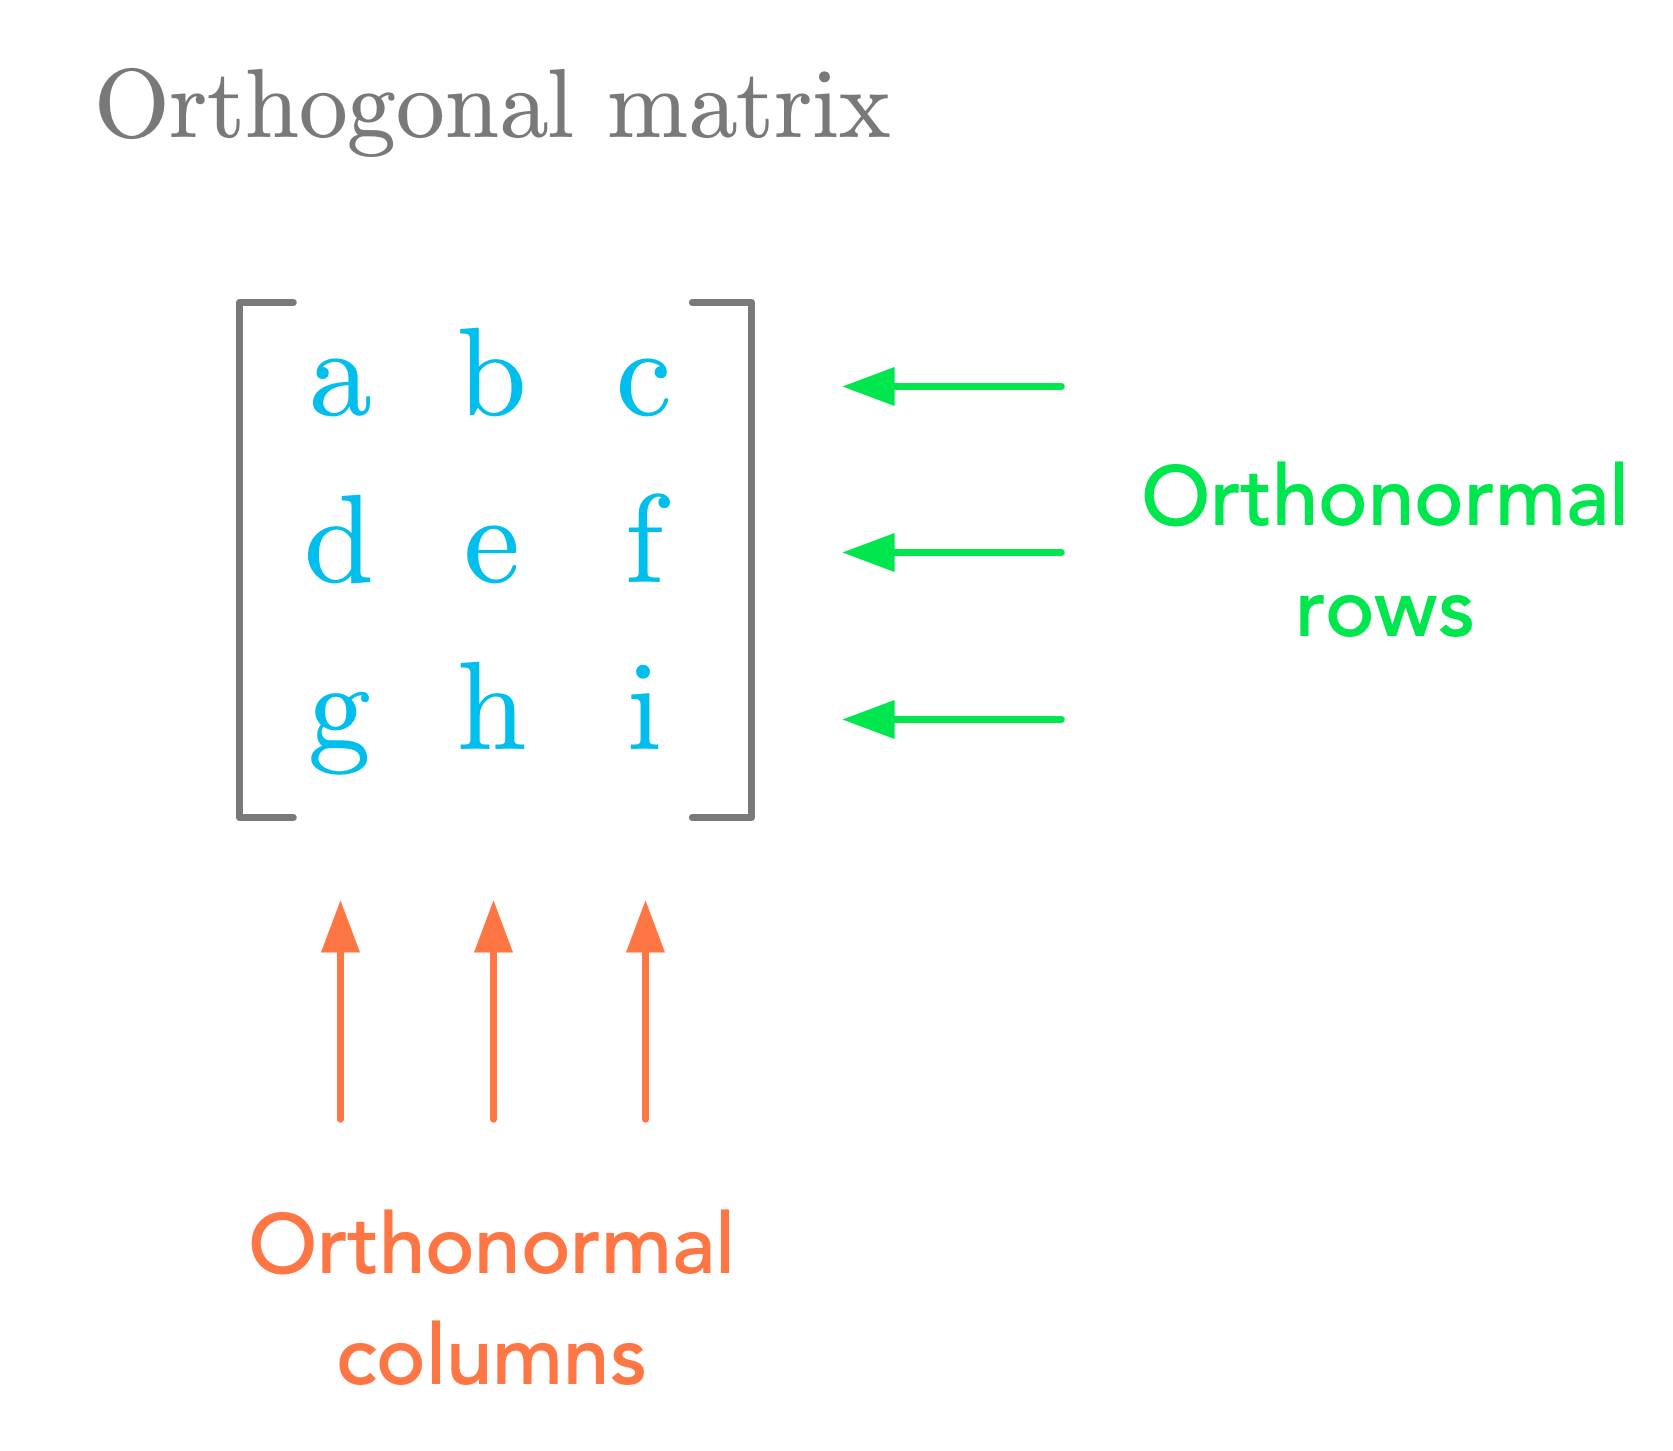<figcaption aria-hidden="true">Figure 107: Illustration of an orthogonal matrix.</figcaption>
</figure>

Any pairs of the matrix rows or columns are orthonormal vectors.
(interestingly, orthogonality of rows implies orthogonality of columns
and *vice versa*.) The first consequence is that the dot product between
each row or between each column gives zero.

Since the vectors are also unit vectors, the dot product of a row or a
column with itself gives one.

This results in the fact that the matrix product between an orthogonal
matrix $\mQ$ and its transpose $\mQ^\text{T}$ gives the identity matrix.
Mathematically, you have:

$$
\mQ \mQ^\text{T} = \mQ^\text{T} \mQ = \mI_n
$$

It corresponds to the dot product of each row with itself for the
diagonals of the resulting matrix. Since the rows are unit vectors, the
diagonal are ones. In addition, the values outside of the diagonal are
calculated with the dot product of pairs of rows, which results in zeros
since the vectors are orthogonal.

Finally, a matrix is orthogonal if its transpose is equal to its
inverse. You saw in Section 6.4.4
that:

$$
\mQ \mQ^{-1} = \mI
$$

And you just saw that:

$$
\mQ \mQ^{\text{T}} = \mI
$$

This implies that the transpose equals the inverse:

$$
\begin{aligned}
\mQ \mQ^{\text{T}} &= \mQ \mQ^{-1} \\\\
\mQ^{\text{T}} &= \mQ^{-1}
\end{aligned}
$$

As diagonal matrices, you’ll need orthogonal matrices in the context of
matrix decomposition in
Section 10.

### 6.4.6 Symmetric Matrices

*Symmetric matrices* are matrices that are equal to their own transpose.

<figure>
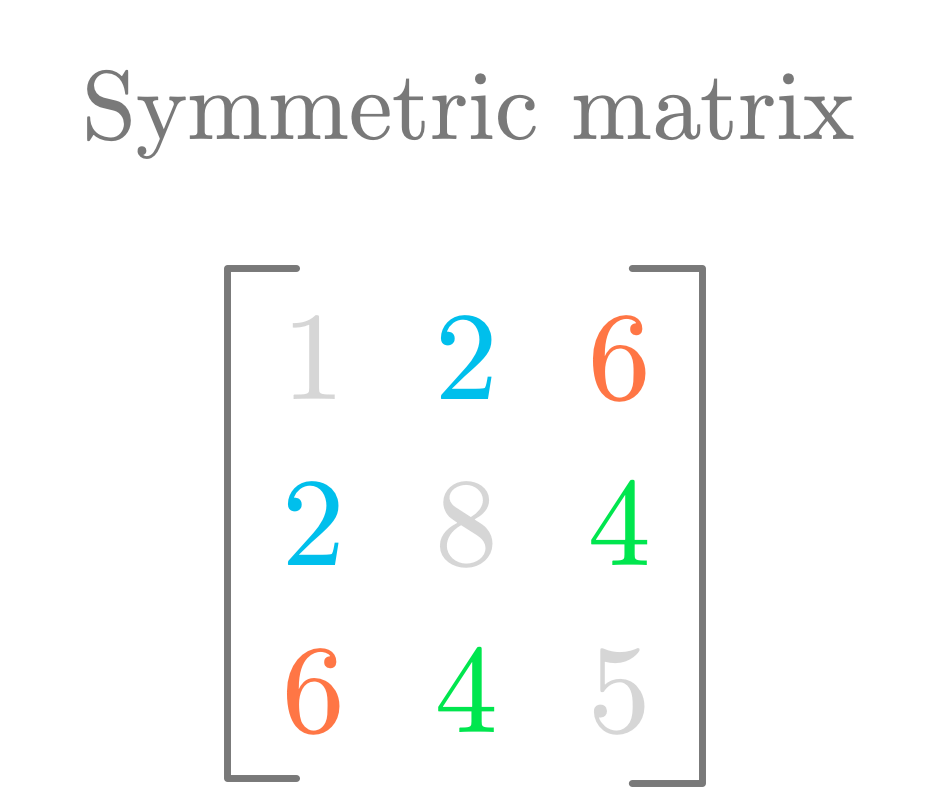<figcaption aria-hidden="true">Figure 108: Illustration of a symmetric matrix.</figcaption>
</figure>

This means that, as shown in Figure [108](#fig:ch07_symmetric_matrix),
they are symmetric with respect to the main diagonal.

Let’s take the example of the following matrix $\mS$:

$$
\mS=
\begin{bmatrix}
    0.4 & -2.3 & 7.5 \\\\
    -2.3 & 1.9 & 4.3 \\\\
    7.5 & 4.3 & 1.0
\end{bmatrix}
$$

Let’s create the corresponding Numpy array and calculate its transpose:

In [40]:
S = np.array([
    [0.4, -2.3, 7.5],
    [-2.3, 1.9, 4.3],
    [7.5, 4.3, 1.0],
])
S.T

array([[ 0.4, -2.3,  7.5],
       [-2.3,  1.9,  4.3],
       [ 7.5,  4.3,  1. ]])

You can see that transposing the matrix $\mS$ doesn’t modify it.

In addition, the product of a matrix with its transpose gives a
symmetric matrix:

$$
\mA^{\text{T}} \mA = \mS
$$

This is because, from the reverse order of the matrices that you saw in
Section 6.3.3, you have:

$$
(\mA^{\text{T}}\mA)^{\text{T}}=\mA^{\text{T}}(\mA^{\text{T}})^{\text{T}}=\mA^{\text{T}}\mA
$$

Some matrices you saw earlier in this section are symmetric. For
instance, square identity matrices are symmetric:

$$
\mI=
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
$$

Other examples of symmetric matrices are correlation matrices or
covariance matrices. You’ll see in
Section 9 that
symmetric matrices have useful decomposition properties.

### 6.4.7 Triangular Matrices

*Triangular matrices* are matrices in which the non-zero values form a
triangle shape, as illustrated in Figure
[109](#fig:ch07_triangular_matrices).

<figure>
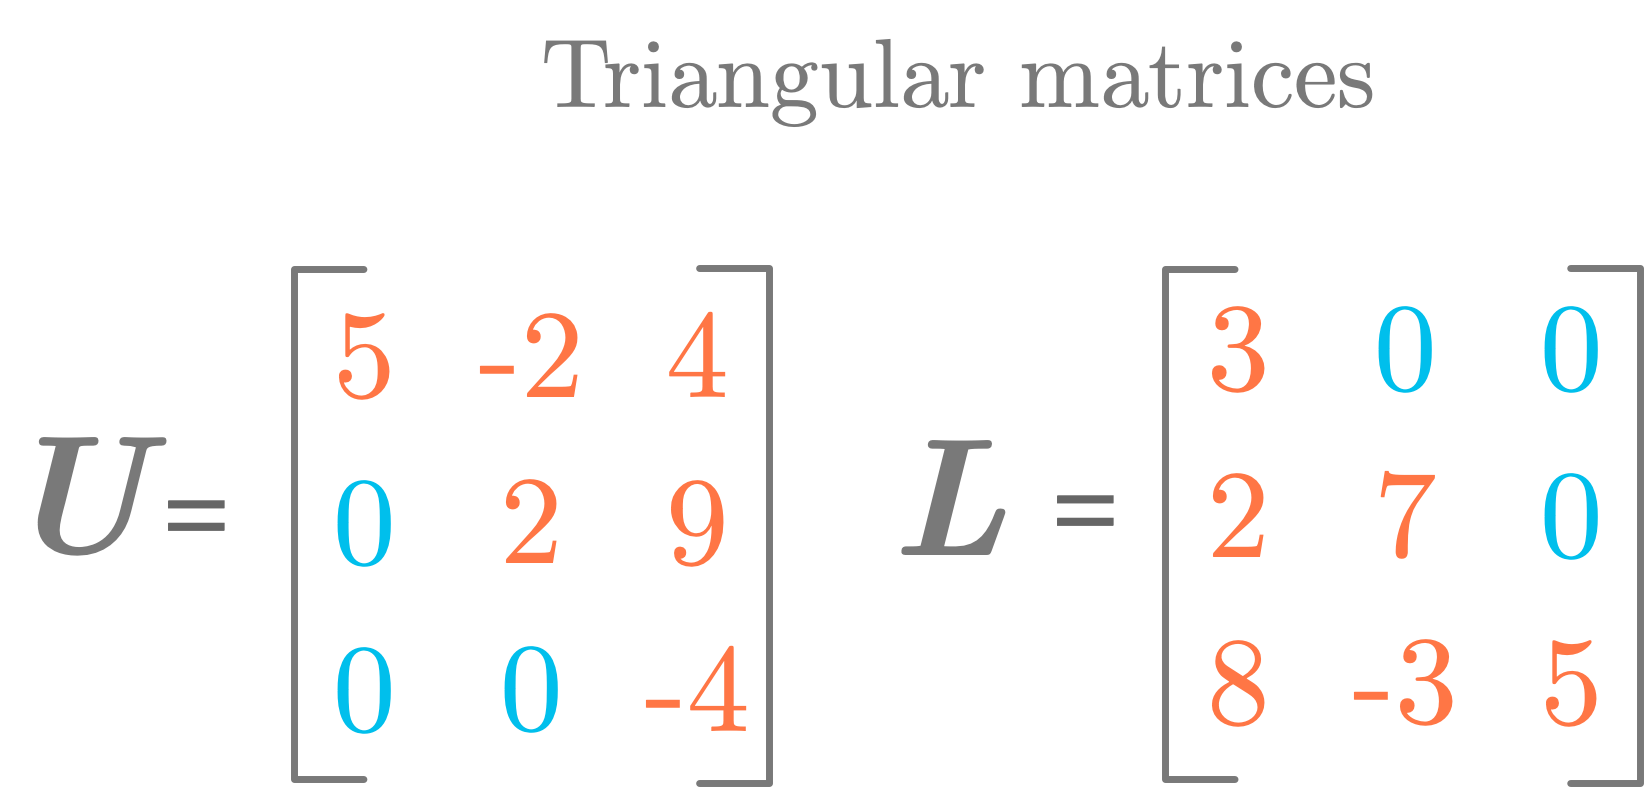<figcaption aria-hidden="true">Figure 109: Upper and lower triangular matrices.</figcaption>
</figure>

*Upper triangular matrices* are matrices with zeros for all entries
except for the upper triangle (up to the main diagonal). *Lower
triangular matrices* have zeros except in the lower triangle (lower to
the main diagonal).

As a fun fact, when upper triangular matrices are multiplied or added
among themselves, they are still upper triangular matrices. This holds
also for lower triangular matrices.

6.5 Hands-on Project: Image Classifier
--------------------------------------

In this hands-on project, you’ll see how to manipulate images and put
them into a shape understandable by machine learning and deep learning
libraries. As a bonus, I have pre-trained a small neural network that
you’ll use on the data.

### 6.5.1 Images as Multi-dimensional Arrays

To use images as input of machine learning models, you need to encode
them in a proper way. Color images are luminance values for each pixel
and each color, so you can encode them as tensors with the following
dimensions: height, width and color. Usually, color is encoded as three
values per pixel (red, green and blue), leading to arrays that have a
shape of (height, width, 3).

To give multiple images to a model you can stack the images: you get
four-dimensional arrays (image, height, width, 3). You’ll see here how
it works in practice.

Let’s use the CIFAR10 dataset (this is a classic dataset used for a lot
of benchmarks. You can refer to the initial paper: Krizhevsky, Alex, and
Geoffrey Hinton. “Learning multiple layers of features from tiny
images.”, 2009: 7.) to play with the manipulation of images as
multi-dimensional arrays. There are 60,000 color images that have 32 by
32 pixels, each of them is labelized as one of ten categories (“birds”,
“trucks” etc.) according to the content of the image.

You can load this dataset using the function `cifar10` from the deep
learning library Keras:

In [41]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

You can see that the function `load_data()` returns multiple variables.
The training set (`X_train`) is the data that you use to train your
model and the test set (`X_test`) the data that you’ll use to evaluate
it. This separation is done to be sure that your model doesn’t work only
on the specific data you trained your model on, but generalizes to new
data. (for more details about training vs test set, you can for instance
refer to the section “Testing and Validating” in Géron, Aurélien.
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow:
Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly
Media, 2019.)

Look at the shape of `X_train` that contains the images:

In [42]:
X_train.shape

(50000, 32, 32, 3)

The shape of `X_train` tells you first that the array has four
dimensions. There are 50,000 images and each image is 32 by 32 pixels
with three colors for each pixel. This means that there are
$32 \cdot 32 \cdot 3 = 3072$ values for each image. This is the number
of features of the dataset and you can consider each of the 50,000
images as a data sample.

The labels of data are in `y_train` (50,000 labels) and `y_test` (10,000
labels). They are numbers between 0 and 9, each corresponding to a
category like airplane, automobile, bird, etc.

You can now use what you learned on Numpy arrays to manipulate
`X_train`. Let’s start by displaying a few images:

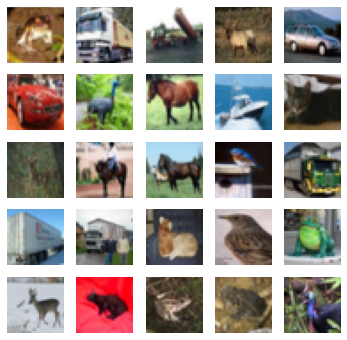

In [43]:
fig, axes = plt.subplots(5, 5, figsize=(6, 6))
for i, ax in zip(np.arange(25), axes.flatten()):
    ax.imshow(X_train[i])
    # [...] Remove grid and axes
    
    ax.grid(None)
    ax.axis('off')
    

<figure>
<figcaption aria-hidden="true">Figure 110: Images from the CIFAR10 dataset.</figcaption>
</figure>

See how you can index the array (`X_train[i]`) as you would do with
vectors or matrices? There is a single index for the four dimensions:
when you provide a single value for the indexing, Numpy uses the first
dimension. Here it returns the $i$th image. But you can also be more
specific and write the four indexes as following:

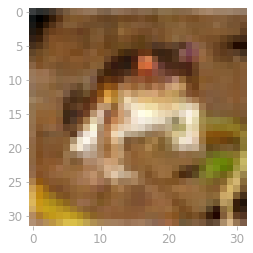

In [44]:
plt.imshow(X_train[0, :, :, :])
plt.show()

<figure>
<figcaption aria-hidden="true">Figure 111: One image from the CIFAR10 dataset.</figcaption>
</figure>

It returns the image with the index zero, and all the height pixels, all
the width pixels, and all the colors using the colons.

The goal of this hands-on is to create a model that takes images as
input and returns the estimated class. I have used the 50,000 images
from `X_train` and their labels in `y_train` to train a deep learning
model. Then, you’ll assess the model performance by predicting the class
for each of the 10,000 images in `X_test` and check the results with the
ground truth (`y_test`).

### 6.5.2 Data Preparation

#### Normalization

It is important that the features have the same scale before you use the
data to train a model. Let’s normalize the values to keep them between
zero and one. Since the maximum luminance value is 255, you just need to
divide by 255.

In [45]:
X_train_rescaled = X_train.astype(np.float32) / 255.0
X_test_rescaled = X_test.astype(np.float32) / 255.0


#### Encoding

You can encode categorical variables in multiple ways. The labels in
CIFAR10 are image categories like ‘birds’, ‘airplanes’ and so one, and
they must be numerically encoded. When you load the dataset with Keras,
the encoding is what is called *label encoding*, meaning that each class
corresponds to a number between 0 and 9. Look at `y_train`:

In [46]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

However, Keras needs *one-hot encoding*, that is to say, one vector for
each image, containing ten values (one per possible class) filled with
zeros except for the category of the image. The position (index) in the
vector corresponds to the category.

You can go from label encoding to one-hot encoding using the utility
function `np_utils.to_categorical` from Keras:

In [47]:
from keras.utils import np_utils
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

Let’s look at the new encoding:

In [48]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_train.shape

(50000, 10)

You can see that the shape of `y_train` is now 50,000 by 10 because
there are ten values (nine zeros and a one) per image.

You saw in this example how to manipulate multi-dimensional arrays to
put images in a shape digestible by machine learning libraries.

Just for the fun, let’s add one more step and use what you did to
classify images. It would be out of the scope of the book to cover the
details of *Convolutional Neural Networks* (CNN), so I trained it so you
can use it to do predictions.

In [50]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D
from keras.layers.normalization import BatchNormalization

model = Sequential()
# [...] Create the model architecture with Keras

model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# load weights (model already trained)
model.load_weights("data/model.h5")


You can use the model to evaluate the test dataset:

In [51]:
scores = model.evaluate(X_test_rescaled, y_test, batch_size=128, verbose=1)
scores[1]

79/79 [==============================] - 4s 53ms/step - loss: 0.4670 - accuracy: 0.8507


0.8507000207901001

The accuracy of the model is around 85% correct.

The goal of this hands-on was to demonstrate that vectors, matrices and
tensors, used as multi-dimensional arrays with Numpy, are the core of
machine learning and deep learning. You saw that batches of images can
be represented as 4D arrays and used under this form with libraries like
Keras.

